In [20]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0.05, 0.07, 0.56, 0.9])
face_color = "red"
vertex_directions = np.array([[1.0, 1.0], [1.0, -1.0], [-1.0, -1.0], [-1.0, 1.0]])
patches_vehicle_1 = patches.Polygon(
                    vertex_directions,
                    alpha=1.0,
                    closed=True,
                    fc=face_color,
                    ec="None",
                    zorder=10,
                    linewidth=2,
                )
ax.add_patch(patches_vehicle_1)
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
plt.show()

KeyboardInterrupt: 

In [ ]:
x = [1,2,3,4]
y = [5,6,7,8]
z = [x,y]
z

[[1, 2, 3, 4], [5, 6, 7, 8]]

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
def simplex(mx,my):
    x = np.zeros(10)
    y = np.zeros(10)
    for i in range(len(mx)):
        x[i] = 1/mx[i]
        y[i] = my[i]
    print(x)
    plt.plot(x,y)
    plt.show()



[0.         0.5        0.66666667 0.75       0.8        0.83333333
 0.85714286 0.875      0.88888889 0.9       ]
[1.         0.5        0.33333333 0.25       0.2        0.16666667
 0.14285714 0.125      0.11111111 0.1       ]


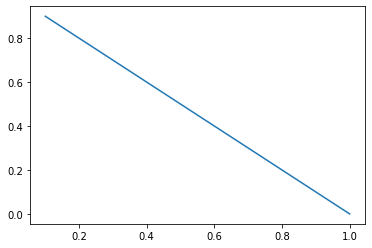

In [ ]:
def get_my(mx):
    my = np.zeros(len(mx))
    for i in range(len(mx)):
        my[i] = 1-1/mx[i]
    return my
mx=np.arange(1,11)
my=get_my(mx)
print(my)
simplex(mx,my)

In [ ]:
np.vstack((np.array([1,2,3,4,5]), np.array([0,5,2,8,4])))

array([[1, 2, 3, 4, 5],
       [0, 5, 2, 8, 4]])

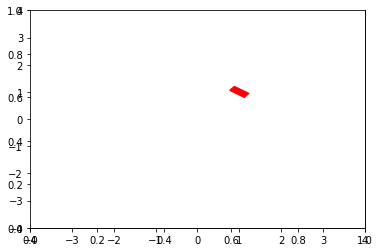

In [ ]:
import matplotlib.transforms as transforms

def get_vehicle_in_rectangle(X0_g,length,width):
    '''
    输入：
    X0_g : 全局坐标系下车辆中心的位置
    length : 车辆的长度
    width : 车辆的宽度
    
    输出：
    矩形顶点的位置
    车辆的长度与宽度
    旋转的角度
    '''
    car_length = length
    car_width = width
    car_dx = 0.5 * car_length
    car_dy = 0.5 * car_width
    car_xs_origin = [car_dx, car_dx, -car_dx, -car_dx, car_dx]
    car_ys_origin = [car_dy, -car_dy, -car_dy, car_dy, car_dy]
    car_frame = np.vstack((np.array(car_xs_origin), np.array(car_ys_origin)))
    x = X0_g[0]
    y = X0_g[1]
    R = np.matrix([[np.cos(X0_g[2]), -np.sin(X0_g[2])],
                   
                    [np.sin(X0_g[2]), np.cos(X0_g[2])]])
    rotated_car_frame = R @ car_frame
    
    angle_deg = np.rad2deg(X0_g[2])  # 将角度转换为度数

    # 创建旋转变换对象
    rotation = transforms.Affine2D().rotate_deg(angle_deg)
    patch.set_transform(rotation + plt.gca().transData)
    return x + rotated_car_frame[0, 2],\
           y + rotated_car_frame[1, 2],\
           2 * car_dx, \
           2 * car_dy, \
           np.rad2deg(X0_g[2])

fig = plt.figure()
car_x, car_y, l, w, angle =  get_vehicle_in_rectangle([1,1,2.5],4.4,1.9)
patch = patches.Rectangle((car_x, car_y), l, w, angle=angle,color="red")
ax = fig.add_subplot(111)
ax.add_patch(patch)
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
plt.show()

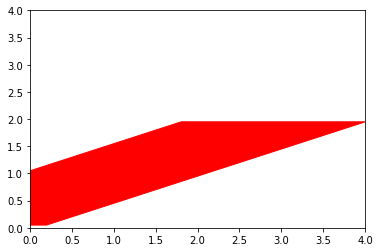

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure()
ax = fig.add_subplot(111)

x = 1
y = 1
width = 4.4
height = 1.9
angle_deg = 30

# 计算矩形四个顶点的坐标
angle_rad = angle_deg * (3.14159 / 180.0)
cos_val = width / 2.0 * np.cos(angle_rad)
sin_val = width / 2.0 * np.sin(angle_rad)
x1 = x - cos_val + sin_val
x2 = x + cos_val + sin_val
x3 = x + cos_val - sin_val
x4 = x - cos_val - sin_val
y1 = y - height / 2.0
y2 = y + height / 2.0

# 绘制矩形
polygon = patches.Polygon([(x1, y1), (x2, y2), (x3, y2), (x4, y1)], closed=True, color='red')
ax.add_patch(polygon)

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

plt.show()


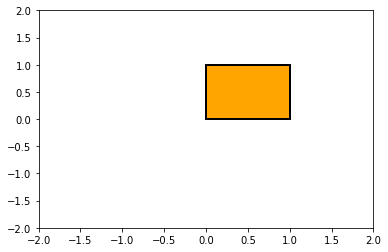

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

#import matplotlib.patheffects
#import matplotlib.transforms

verts = [
    (0., 0.), # 矩形左下角的坐标(left,bottom)
    (0., 1.), # 矩形左上角的坐标(left,top)
    (1., 1.), # 矩形右上角的坐标(right,top)
    (1., 0.), # 矩形右下角的坐标(right, bottom)
    (0., 0.),] # 封闭到起点    

codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]

path = Path(verts, codes) #创建一个路径path对象

#依然是三步走
#第一步：创建画图对象以及创建子图对象
fig = plt.figure()
ax = fig.add_subplot(111)

#第二步：创建一个patch，路径依然也是通过patch实现的，只不过叫做pathpatch
patch = patches.PathPatch(path, facecolor='orange', lw=2)

#第三步：将创建的patch添加到axes对象中
ax.add_patch(patch)

#显示
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
plt.show()

In [ ]:
import math
class MyReferencePath:
    def __init__(self):
        # set reference trajectory
        # refer_path包括4维：位置x, 位置y， 轨迹点的切线方向, 曲率k 
        self.refer_path = np.zeros((1000, 4))
        self.refer_path[:,0] = np.linspace(0, 100, 1000) # x
        self.refer_path[:,1] = 2*np.sin(self.refer_path[:,0]/3.0)+2.5*np.cos(self.refer_path[:,0]/2.0) # y
        # 使用差分的方式计算路径点的一阶导和二阶导，从而得到切线方向和曲率
        for i in range(len(self.refer_path)):
            if i == 0:
                dx = self.refer_path[i+1,0] - self.refer_path[i,0]
                dy = self.refer_path[i+1,1] - self.refer_path[i,1]
                ddx = self.refer_path[2,0] + self.refer_path[0,0] - 2*self.refer_path[1,0]
                ddy = self.refer_path[2,1] + self.refer_path[0,1] - 2*self.refer_path[1,1]
            elif i == (len(self.refer_path)-1):
                dx = self.refer_path[i,0] - self.refer_path[i-1,0]
                dy = self.refer_path[i,1] - self.refer_path[i-1,1]
                ddx = self.refer_path[i,0] + self.refer_path[i-2,0] - 2*self.refer_path[i-1,0]
                ddy = self.refer_path[i,1] + self.refer_path[i-2,1] - 2*self.refer_path[i-1,1]
            else:      
                dx = self.refer_path[i+1,0] - self.refer_path[i,0]
                dy = self.refer_path[i+1,1] - self.refer_path[i,1]
                ddx = self.refer_path[i+1,0] + self.refer_path[i-1,0] - 2*self.refer_path[i,0]
                ddy = self.refer_path[i+1,1] + self.refer_path[i-1,1] - 2*self.refer_path[i,1]
            self.refer_path[i,2]=math.atan2(dy,dx) # yaw
            self.refer_path[i,3]=(ddy * dx - ddx * dy) / ((dx ** 2 + dy ** 2)**(3 / 2)) # 曲率k计算

In [ ]:
reference_path = MyReferencePath()
goal = reference_path.refer_path[-1,0:2]

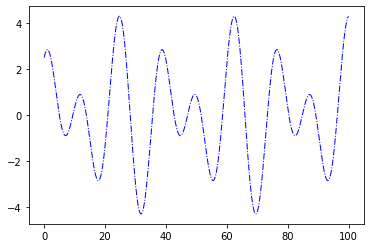

In [ ]:
plt.plot(reference_path.refer_path[:,0], reference_path.refer_path[:,1], "-.b",  linewidth=1.0, label="course")

In [ ]:
import numpy as np
np.rad2deg(0.2867730481782686)

16.43088533871661

In [ ]:
np.tan(16)

0.3006322420239034

In [ ]:
import numpy as np
z = np.zeros(3)
z

array([0., 0., 0.])

In [ ]:
import numpy as np
y = np.array([2,8,1,9])
(y==0).any()

False

In [ ]:
k = 5
li = [1,2,5,80]
for i in range(len(li)):
    k = k+li[i]
k

93

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt


class MyReferencePath:
    def __init__(self):
        self.refer_path = np.zeros((2000, 6))
        self.refer_path[:,0] = np.linspace(0, 20, 2000) # x
        self.refer_path[:,1] = 2*np.sin(self.refer_path[:,0]/8.0) # y
        for i in range(len(self.refer_path)):
            if i == 0:
                dx = self.refer_path[i+1,0] - self.refer_path[i,0]
                dy = self.refer_path[i+1,1] - self.refer_path[i,1]
                ddx = self.refer_path[2,0] + self.refer_path[0,0] - 2*self.refer_path[1,0]
                ddy = self.refer_path[2,1] + self.refer_path[0,1] - 2*self.refer_path[1,1]
                ds = 0
            elif i == (len(self.refer_path)-1):
                dx = self.refer_path[i,0] - self.refer_path[i-1,0]
                dy = self.refer_path[i,1] - self.refer_path[i-1,1]
                ddx = self.refer_path[i,0] + self.refer_path[i-2,0] - 2*self.refer_path[i-1,0]
                ddy = self.refer_path[i,1] + self.refer_path[i-2,1] - 2*self.refer_path[i-1,1]
                dx_s = self.refer_path[i,0] - self.refer_path[i-1,0]
                dy_s = self.refer_path[i,1] - self.refer_path[i-1,1]
                ds = np.sqrt(dx_s**2+dy_s**2)
            else:      
                dx = self.refer_path[i+1,0] - self.refer_path[i,0]
                dy = self.refer_path[i+1,1] - self.refer_path[i,1]
                ddx = self.refer_path[i+1,0] + self.refer_path[i-1,0] - 2*self.refer_path[i,0]
                ddy = self.refer_path[i+1,1] + self.refer_path[i-1,1] - 2*self.refer_path[i,1]
                
                dx_s = self.refer_path[i,0] - self.refer_path[i-1,0]
                dy_s = self.refer_path[i,1] - self.refer_path[i-1,1]
                ds = np.sqrt(dx_s**2+dy_s**2)
                
            self.refer_path[i,2]=math.atan2(dy,dx) # yaw
            self.refer_path[i,3]=(ddy * dx - ddx * dy) / ((dx ** 2 + dy ** 2)**(3 / 2)) 
            self.refer_path[i,4] = ds
            
            for j in range(i+1):
                self.refer_path[i,5] += self.refer_path[j,4]

    def get_nearst_s(self,s):
        index_list = np.where(abs(self.refer_path[:,5] - s) < 0.015)[0]
        distance = np.zeros(len(index_list))
        for i in range(len(index_list)):
            distance[0] = (s - self.refer_path[i,5])**2
        index = np.argmin(distance)
        first_index = index_list[0]
        index_d = first_index + index
        print(index_d)
        return index_d
            
    def get_k(self,s):
        index_k = self.get_nearst_s(s)
        k = self.refer_path[index_k,3]
        return k
    
    def get_len(self):
        return self.refer_path[len(self.refer_path)-1,5]
    
    def get_theta_r(self,s):
        index_theta_r =   self.get_nearst_s(s)
        theta_r = self.refer_path[index_theta_r,2]
        return theta_r
    


In [ ]:
refer_path = MyReferencePath()

In [ ]:
refer_path.refer_path[0:50,5]

array([0.        , 0.01031292, 0.02062584, 0.03093876, 0.04125167,
       0.05156458, 0.06187749, 0.07219039, 0.08250328, 0.09281617,
       0.10312905, 0.11344192, 0.12375477, 0.13406762, 0.14438045,
       0.15469327, 0.16500608, 0.17531887, 0.18563165, 0.19594441,
       0.20625715, 0.21656987, 0.22688257, 0.23719525, 0.24750791,
       0.25782054, 0.26813315, 0.27844574, 0.2887583 , 0.29907084,
       0.30938335, 0.31969583, 0.33000828, 0.3403207 , 0.35063308,
       0.36094544, 0.37125776, 0.38157005, 0.39188231, 0.40219452,
       0.4125067 , 0.42281885, 0.43313095, 0.44344302, 0.45375504,
       0.46406702, 0.47437896, 0.48469086, 0.49500271, 0.50531451])

In [ ]:
refer_path.get_theta_r(0)

NameError: name 'refer_path' is not defined

In [ ]:
x_refer_path = [0,5,8,9,7]
T = 20
delta_x_list = [(x_refer_path[i]-x_refer_path[i-1]) for i in range(T+2)]
delta_x_list

IndexError: list index out of range

In [ ]:
import numpy as np
import math
math.pi

3.141592653589793

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
from scipy import signal
from progress.bar import Bar
class ScaledGP:
    def __init__(self,xdim=1,ydim=1):
        self.xdim=xdim  
        self.ydim=ydim  
        self.ystd = np.ones(ydim)
        self.ymean = np.zeros(ydim)
        self.xstd = np.ones(xdim)
        self.xmean = np.zeros(xdim)
        self.m = GPy.models.GPRegression(np.zeros((1,xdim)),np.zeros((1,ydim)))

    #将现有的数据进行训练
    def optimize(self,x,y,update_scaling=True, num_inducing=50):
        assert(x.shape[1] == self.xdim and y.shape[1] == self.ydim)
        assert(x.shape[0] > 0 and y.shape[0] > 0)
        
        xmean = self.xmean
        xstd = self.xstd
        ymean = self.ymean
        ystd = self.ystd
        if update_scaling:
            xmean,xstd = self.update_xscale(x)
            ymean,ystd = self.update_yscale(y)

        x = self.scalex(x,xmean,xstd)
        y = self.scaley(y,ymean,ystd)
        updated_model = GPy.models.GPRegression(x,y)
        # self.m = GPy.models.SparseGPRegression(x,y,num_inducing=num_inducing)
        updated_model.optimize('bfgs')
        self.m = updated_model

        self.xmean = xmean
        self.xstd = xstd
        self.ymean = ymean
        self.ystd = ystd

    def predict(self,x):
        x = self.scalex(x,self.xmean,self.xstd)
        mean,var = self.m.predict_noiseless(x)
        mean = self.unscaley(mean,self.ymean,self.ystd)
        var = var * self.ystd
        if mean.size == 1:
            mean = mean[0,0]
            var = var[0,0]
        return mean,var

    def update_xscale(self,x):
        xmean = np.mean(x,axis=0)
        xstd = np.std(x,axis=0)

        return xmean,xstd

    def update_yscale(self,y):
        ymean = np.mean(y,axis=0)
        ystd = np.std(y,axis=0)

        return ymean, ystd

    #numpy数组中有一个元素为0则返回 x-xmean, 否则返回 (x-xmean)/xstd, 防止发生除以0的状况
    def scalex(self,x,xmean,xstd):
        if (xstd == 0).any():   
            return (x-xmean)
        else:
            return (x - xmean) / xstd

    def scaley(self,y,ymean,ystd):
        if (ystd == 0).any():
            return (y-ymean)
        else:
            return (y - ymean) / ystd
        
    def unscalex(self,x,xmean,xstd):
        if (xstd == 0).any():
            return x + xmean
        else:
            return x * xstd + xmean

    def unscaley(self,y,ymean,ystd):
        if (ystd == 0).any():
            return y + ymean
        else:
            return y * ystd + ymean

In [ ]:

class ModelGP:
    def __init__(self,xdim,ydim,verbose=True):

        self.m = ScaledGP(xdim=xdim,ydim=ydim)
        self.y = np.zeros((0,ydim))  #数据集中的label集合
        self.z = np.zeros((0,xdim))  #数据集中的feature vector集合
        self.N_data = 400

        self.model_trained = False
        self.verbose = verbose

    #GPR model的输入 z = [vx, vy, w, ax, delta]
    def make_input(self,vx_ref,vy_ref,w_ref,delta):
        z = np.zeros((1,4))
        z[0,0] = vx_ref
        z[0,1] = vy_ref
        z[0,2] = w_ref    
        z[0,3] = delta
        return z
    
    #给定z，进行模型预测
    def predict(self,vx_ref,vy_ref,w_ref,delta):
        z = self.make_input(vx_ref,vy_ref,w_ref,delta)
        y, var = self.m.predict(z)
        return y, var.T

    #数据集进行训练
    def train(self):
        if self.z.shape[0] > 0:
            self.m.optimize(self.z,self.y)
            self.model_trained = True

    def add_data(self,x_observed,x_clac,delta):
        select_matrix = np.zeros((6,6))
        select_matrix[1,1] = 1
        select_matrix[2,2] = 1
        ynew = select_matrix.dot(x_observed - x_clac)
        ynew = ynew[np.newaxis,:]
        
        znew = self.make_input(x_observed[0],x_observed[1],x_observed[2],delta)
        self.y = np.concatenate((self.y,ynew))
        self.z = np.concatenate((self.z,znew))

        # throw away old samples if too many samples collected.
        if self.y.shape[0] > self.N_data:
            self.y = self.y[-self.N_data:,:]
            self.z = self.z[-self.N_data:,:]
            # self.y = np.delete(self.y,random.randint(0,self.N_data-1),axis=0)
            # self.z = np.delete(self.z,random.randint(0,self.N_data-1),axis=0)

        if self.verbose:
            print("ynew",ynew)
            print("znew",znew)
            print("n data:", self.y.shape[0])
            # print("prediction error:", self.predict_error)
            # print("predict var:", self.predict_var)

In [ ]:
GPR_model = ModelGP(4,6)

In [ ]:
x_observed = np.array([15.2,1.26,0.6,500,0.3,0.1])
x_calc = np.array([17.1,1.5,0.6,501,0.5,0.1])
GPR_model.add_data(x_observed,x_calc,0.6)

self.y= (0, 6)
ynew= (1, 6)
ynew [[ 0.  -0.3 -0.1  0.   0.   0. ]]
znew [[15.   1.2  0.5  0.6]]
n data: 1


In [ ]:
import numpy as np
-np.arctan2(np.tanh(15**2)*2.6,1)

-1.2036224929766774

In [ ]:
y = np.array([[1,2,3],
              [4,5,6],
              [7,8,9],
              [4,9,5],
              [8,9,6],
              [5,9,6]])
y[-5:,:]

array([[4, 5, 6],
       [7, 8, 9],
       [4, 9, 5],
       [8, 9, 6],
       [5, 9, 6]])

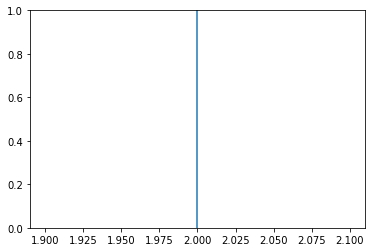

In [ ]:
import matplotlib.pyplot as plt
plt.axvline(2)

In [ ]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
import multiprocessing
import threading

# GPR训练数据
X_train_gpr_1 = np.array([[...]])  # 第一个GPR的输入数据
y_train_gpr_1 = np.array([...])  # 第一个GPR的输出数据
X_train_gpr_2 = np.array([[...]])  # 第二个GPR的输入数据
y_train_gpr_2 = np.array([...])  # 第二个GPR的输出数据

# 创建两个GPR模型
gpr_model_1 = GaussianProcessRegressor()
gpr_model_2 = GaussianProcessRegressor()

# GPR训练函数
def train_gpr_model_1():
    gpr_model_1.fit(X_train_gpr_1, y_train_gpr_1)

def train_gpr_model_2():
    gpr_model_2.fit(X_train_gpr_2, y_train_gpr_2)

# 创建线程锁，确保线程安全
lock = threading.Lock()

# 定义线程函数
def train_gpr_thread_1():
    with lock:
        train_gpr_model_1()

def train_gpr_thread_2():
    with lock:
        train_gpr_model_2()

# 创建GPR训练线程
train_gpr_thread_1 = threading.Thread(target=train_gpr_thread_1)
train_gpr_thread_2 = threading.Thread(target=train_gpr_thread_2)

# 启动GPR训练线程
train_gpr_thread_1.start()
train_gpr_thread_2.start()

# 创建MPC进程函数
def mpc_optimization():
    while True:
        # 执行MPC的优化操作

# 创建MPC进程
mpc_process = multiprocessing.Process(target=mpc_optimization)

# 启动MPC进程
mpc_process.start()

# 等待GPR训练线程结束
train_gpr_thread_1.join()
train_gpr_thread_2.join()

# 等待MPC进程结束
mpc_process.join()


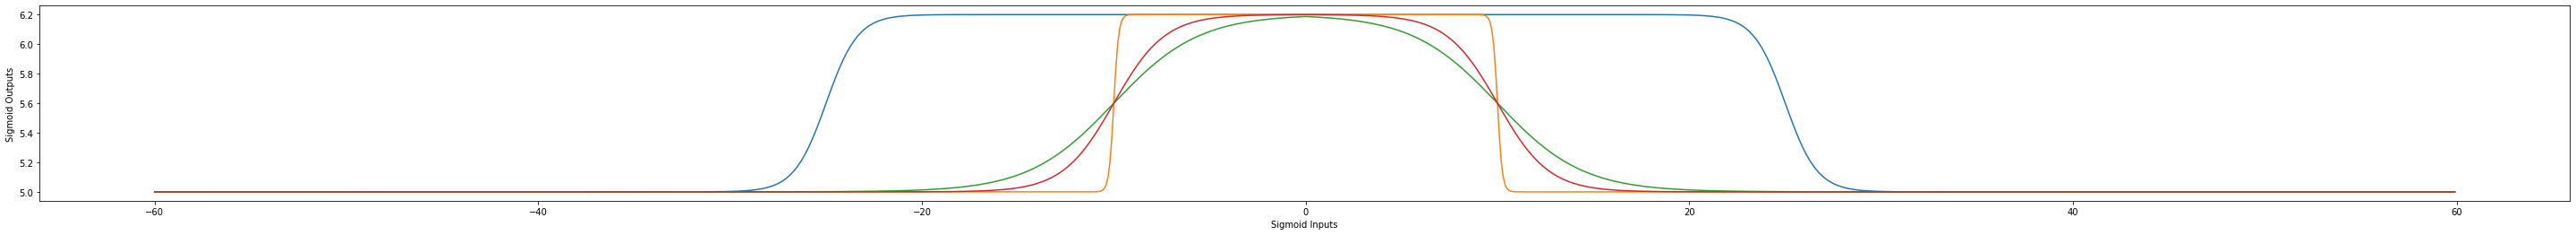

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x,param,S_f,barrier_y_position):
    return barrier_y_position + 1.2 / (1 + np.exp(-param*(S_f-np.abs(x)))) 
sigmoid_inputs = np.arange(-60, 60, 0.1)
sigmoid_outputs0 = sigmoid(sigmoid_inputs,0.0,25,5)
sigmoid_outputs1 = sigmoid(sigmoid_inputs,1.2,25,5)
sigmoid_outputs2 = sigmoid(sigmoid_inputs,8,10,5)
sigmoid_outputs3 = sigmoid(sigmoid_inputs,0.45,10,5)
sigmoid_outputs4 = sigmoid(sigmoid_inputs,0.75,10,5)
# plt.plot(sigmoid_inputs, sigmoid_outputs0)
plt.plot(sigmoid_inputs, sigmoid_outputs1)
plt.plot(sigmoid_inputs, sigmoid_outputs2)
plt.plot(sigmoid_inputs, sigmoid_outputs3)
plt.plot(sigmoid_inputs, sigmoid_outputs4)
plt.xlabel("Sigmoid Inputs")
plt.ylabel("Sigmoid Outputs")
maxsize = 30
m = 0.2  # inch margin
s = maxsize / plt.gcf().dpi * 100 + 2 * m
margin = m / plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right = 1. - margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
plt.show()

In [ ]:
inputs = np.arange(-60, 60, 0.1)

In [ ]:
def arctan_barrier(x):
    return np.arctan2(x)
outputs = arctan_barrier(inputs)
plt.plot(inputs,outputs)

ValueError: invalid number of arguments

In [ ]:
import numpy as np
position_list = np.array([[1,2],
                          [5,8],
                          [6,3]])

position = np.array([[4,9]])
position_list-position


array([[-3, -7],
       [ 1, -1],
       [ 2, -6]])

In [ ]:
difference = position - position_list
d = [np.sqrt(difference[i,0]**2+difference[i,1]**2) for i in range(3)]
d

[7.615773105863909, 1.4142135623730951, 6.324555320336759]

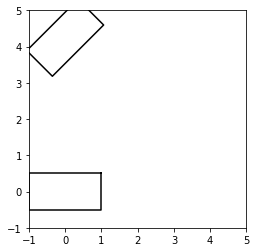

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_car(x, y, yaw, length=2.0, width=1.0):
    car_outline = np.array([[x + length / 2, x + length / 2, x - length / 2, x - length / 2, x + length / 2],
                            [y + width / 2, y - width / 2, y - width / 2, y + width / 2, y + width / 2]])

    rotation_matrix = np.array([[np.cos(yaw), -np.sin(yaw)],
                                [np.sin(yaw), np.cos(yaw)]])

    car_outline_rotated = np.dot(rotation_matrix, car_outline)

    plt.plot(car_outline_rotated[0, :], car_outline_rotated[1, :], 'k-')

# test the function
plt.figure()
draw_car(0, 0, 0)
draw_car(3, 3, np.pi/4)
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


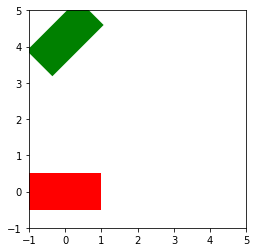

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_car(x, y, yaw, length=2.0, width=1.0, color='blue'):
    car_outline = np.array([[x + length / 2, x + length / 2, x - length / 2, x - length / 2, x + length / 2],
                            [y + width / 2, y - width / 2, y - width / 2, y + width / 2, y + width / 2]])

    rotation_matrix = np.array([[np.cos(yaw), -np.sin(yaw)],
                                [np.sin(yaw), np.cos(yaw)]])

    car_outline_rotated = np.dot(rotation_matrix, car_outline)

    plt.fill(car_outline_rotated[0, :], car_outline_rotated[1, :], color)

# test the function
plt.figure()
draw_car(0, 0, 0, color='red')
draw_car(3, 3, np.pi/4, color='green')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


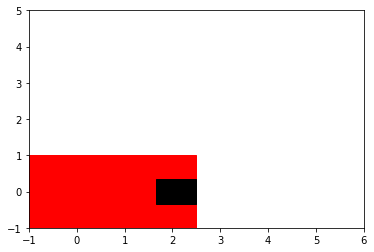

In [ ]:
import matplotlib.patches as patches

def plot_car(x, y, length=5.0, width=2.0, color='blue'):
    # 创建一个矩形实例，位置以车辆的中心为准
    car = patches.Rectangle((x - length / 2, y - width / 2), length, width, 
                            color=color)
    
    # 创建两个车轮实例
    wheel_width = width / 3
    wheel_length = length / 6
    front_wheel = patches.Rectangle((x + length / 3, y - wheel_width / 2), 
                                    wheel_length, wheel_width, color='black')
    back_wheel = patches.Rectangle((x - length / 2, y - wheel_width / 2), 
                                   wheel_length, wheel_width, color='black')

    # 在当前的axes上添加矩形
    plt.gca().add_patch(car)
    plt.gca().add_patch(front_wheel)
    plt.gca().add_patch(back_wheel)

# 调用plot_car函数绘制一辆车
plot_car(0, 0, color='red')
plt.xlim(-1, 6)
plt.ylim(-1, 5)

# 在绘制完所有的图形之后，调用plt.show()来显示图像
plt.show()


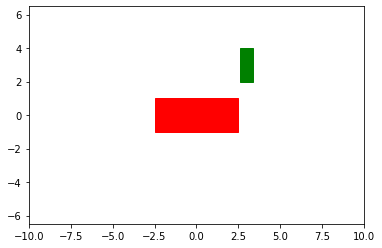

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_car(x, y, length=5.0, width=2.0, color='blue'):
    # 创建一个矩形实例，位置以车辆的中心为准
    car = patches.Rectangle((x - length / 2, y - width / 2), length, width, color=color)
    
    # 在当前的axes上添加矩形
    plt.gca().add_patch(car)
    
# 调用plot_car函数绘制一辆车
plot_car(0, 0, color='red')
plot_car(3, 3, np.pi/4, color='green')
# 设置坐标轴的范围和比例以便看清楚
plt.axis('equal')
plt.xlim(-10,10)
plt.ylim(-10,10)

# 在绘制完所有的图形之后，调用plt.show()来显示图像
plt.show()


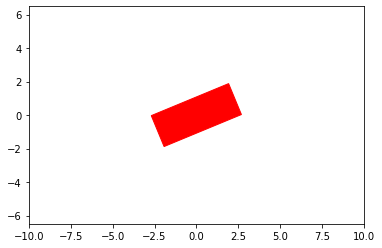

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.transforms import Affine2D
import numpy as np

def plot_car(x, y, yaw_rad, length=5.0, width=2.0, color='blue'):
    # 创建一个矩形实例，位置以车辆的中心为准
    car = patches.Rectangle((x - length / 2, y - width / 2), length, width, color=color)

    # 将弧度转换为度
    yaw_deg = np.rad2deg(yaw_rad)

    # 创建一个仿射变换实例，用于旋转矩形
    transform = Affine2D().rotate_deg_around(x, y, yaw_deg) + plt.gca().transData

    # 将变换应用于矩形
    car.set_transform(transform)
    
    # 在当前的axes上添加矩形
    plt.gca().add_patch(car)

# 调用plot_car函数绘制一辆车
plot_car(0, 0, yaw_rad=np.pi/8, color='red')

# 设置坐标轴的范围和比例以便看清楚
plt.axis('equal')
plt.xlim(-10,10)
plt.ylim(-10,10)

# 在绘制完所有的图形之后，调用plt.show()来显示图像
plt.show()



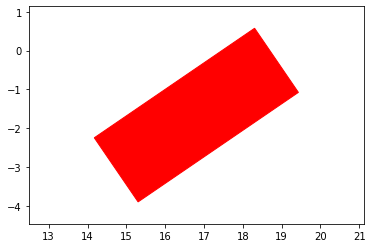

In [ ]:
X=[-250.0, 14.99275863441048, 15.045985345011774, 15.051244061110761, 15.139640560396385, 15.153171323505147, 15.207754652999036, 15.22832620073461, 15.227430449532577, 15.226095985440383, 15.217667286512206, 15.230127742540517, 15.25927706161929, 15.317989733319973, 15.401083321897293, 15.510995571038972, 15.6319649802704, 15.776412527683862, 15.935270516808501, 16.107934181151744, 16.278606306178784, 16.44106403398681, 16.581199262178206, 16.694034674918598, 16.775352506533988, 16.803285117570503, 16.84336881554819, 16.868553786894754, 16.903948618071016, 16.936949933617147, 16.981863971495763, 17.031858173140694, 17.09471969762089, 17.166068479947853, 17.24820708372737, 17.337648761373995, 17.43381519200106, 17.53296461748372, 17.632245025760678, 17.730394888841357, 17.826677100770006, 17.9208802409993, 18.012981219689358, 18.103103027038387, 18.19140247459206, 18.27805459829963, 18.36322582326406, 18.447062535907207, 18.52969487856512]
Y=[-355.25, -0.1894225221391067, -0.11642985012281679, 0.06362682189356092, 0.5320116894230592, 0.9376503751423942, 1.6472223111810824, 2.1591085154353387, 2.786117551010253, 3.2368829834365824, 3.636764728634292, 3.8861075719749456, 4.042250395342782, 4.074870195472012, 4.0159425219663, 3.858127347275725, 3.650503429114803, 3.3392223290222933, 2.9365933207301054, 2.4280567759494804, 1.8433442584439654, 1.1834270392664923, 0.4887783742791868, -0.22639366757527168, -0.9187580707810852, -1.6626064469825197, -2.0770234258014106, -2.520166887793732, -2.782070869249825, -3.037729984934139, -3.181084138907343, -3.2919778889904383, -3.3206994676357535, -3.3069831907140728, -3.2331248008115447, -3.1220249790970134, -2.9677940245161536, -2.7874729497890236, -2.5991839601896203, -2.410327395208715, -2.227679516142924, -2.0537804289960597, -1.8905911302844682, -1.7383593030762614, -1.5970495666240534, -1.4661470134797936, -1.3448552371540765, -1.2324662551146852, -1.12805104833631]
Psi=[0.0, -0.28425648263108644, -0.4859506179669991, -0.7332016530951013, -0.7923414612666093, -0.9764754402998894, -0.8687958395619051, -0.894813123384934, -0.7404963014754157, -0.6417387263662646, -0.48289424031611167, -0.35254644576710437, -0.20638443352110925, -0.07926974622464816, 0.04816047795818498, 0.16000517473627673, 0.30767218668782104, 0.44816323332516594, 0.5876207510548976, 0.6996842377102087, 0.7938876813598461, 0.848374590211249, 0.8745959195344182, 0.8588978820891402, 0.8152102170879747, 0.5993529410781894, 0.5718122934551432, 0.44249922463624125, 0.40239391579307227, 0.3080258887468111, 0.2535250910030606, 0.1743725976600604, 0.11716231101384593, 0.05383204150784933, 0.005746855991013364, -0.039489232096431, -0.0676908934675966, -0.08110595057915887, -0.08719756370113081, -0.08757876943141421, -0.0852925298308629, -0.08121439545045019, -0.07658476947700928, -0.07176132483412001, -0.06714690955462872, -0.0629426169544641, -0.059159666403298616, -0.0559113320874416, -0.05308802786728339]
import os
dirpath = "C:\\Users\\sym02\\Desktop\\Research\\Extension\\codes\\copy_test"
def plot_car(x, y, yaw_rad, length=5.0, width=2.0, color='blue'):
    # 创建一个矩形实例，位置以车辆的中心为准
    car = patches.Rectangle((x - length / 2, y - width / 2), length, width, color=color)

    # 将弧度转换为度
    yaw_deg = np.rad2deg(yaw_rad)

    # 创建一个仿射变换实例，用于旋转矩形
    transform = Affine2D().rotate_deg_around(x, y, yaw_deg) + plt.gca().transData

    # 将变换应用于矩形
    car.set_transform(transform)
    
    # 在当前的axes上添加矩形
    plt.gca().add_patch(car)
    
plot_car(X[25], Y[25], yaw_rad=Psi[25], color='red')

# 设置坐标轴的范围和比例以便看清楚
plt.axis('equal')
plt.xlim((X[25] - 5, X[25] + 5))
plt.ylim((Y[25] - 2.8, Y[25] + 2.8))
if not os.path.exists(dirpath+"\\figsave"):
    os.mkdir(dirpath+"\\figsave")
plt.savefig((dirpath+"\\figsave\{}".format("k")),dpi=600)
# 在绘制完所有的图形之后，调用plt.show()来显示图像
plt.show()


In [ ]:
X=[-250.0, 14.99275863441048, 15.045985345011774, 15.051244061110761, 15.139640560396385, 15.153171323505147, 15.207754652999036, 15.22832620073461, 15.227430449532577, 15.226095985440383, 15.217667286512206, 15.230127742540517, 15.25927706161929, 15.317989733319973, 15.401083321897293, 15.510995571038972, 15.6319649802704, 15.776412527683862, 15.935270516808501, 16.107934181151744, 16.278606306178784, 16.44106403398681, 16.581199262178206, 16.694034674918598, 16.775352506533988, 16.803285117570503, 16.84336881554819, 16.868553786894754, 16.903948618071016, 16.936949933617147, 16.981863971495763, 17.031858173140694, 17.09471969762089, 17.166068479947853, 17.24820708372737, 17.337648761373995, 17.43381519200106, 17.53296461748372, 17.632245025760678, 17.730394888841357, 17.826677100770006, 17.9208802409993, 18.012981219689358, 18.103103027038387, 18.19140247459206, 18.27805459829963, 18.36322582326406, 18.447062535907207, 18.52969487856512]

In [ ]:
Y=[-355.25, -0.1894225221391067, -0.11642985012281679, 0.06362682189356092, 0.5320116894230592, 0.9376503751423942, 1.6472223111810824, 2.1591085154353387, 2.786117551010253, 3.2368829834365824, 3.636764728634292, 3.8861075719749456, 4.042250395342782, 4.074870195472012, 4.0159425219663, 3.858127347275725, 3.650503429114803, 3.3392223290222933, 2.9365933207301054, 2.4280567759494804, 1.8433442584439654, 1.1834270392664923, 0.4887783742791868, -0.22639366757527168, -0.9187580707810852, -1.6626064469825197, -2.0770234258014106, -2.520166887793732, -2.782070869249825, -3.037729984934139, -3.181084138907343, -3.2919778889904383, -3.3206994676357535, -3.3069831907140728, -3.2331248008115447, -3.1220249790970134, -2.9677940245161536, -2.7874729497890236, -2.5991839601896203, -2.410327395208715, -2.227679516142924, -2.0537804289960597, -1.8905911302844682, -1.7383593030762614, -1.5970495666240534, -1.4661470134797936, -1.3448552371540765, -1.2324662551146852, -1.12805104833631]

In [ ]:
Psi=[0.0, -0.28425648263108644, -0.4859506179669991, -0.7332016530951013, -0.7923414612666093, -0.9764754402998894, -0.8687958395619051, -0.894813123384934, -0.7404963014754157, -0.6417387263662646, -0.48289424031611167, -0.35254644576710437, -0.20638443352110925, -0.07926974622464816, 0.04816047795818498, 0.16000517473627673, 0.30767218668782104, 0.44816323332516594, 0.5876207510548976, 0.6996842377102087, 0.7938876813598461, 0.848374590211249, 0.8745959195344182, 0.8588978820891402, 0.8152102170879747, 0.5993529410781894, 0.5718122934551432, 0.44249922463624125, 0.40239391579307227, 0.3080258887468111, 0.2535250910030606, 0.1743725976600604, 0.11716231101384593, 0.05383204150784933, 0.005746855991013364, -0.039489232096431, -0.0676908934675966, -0.08110595057915887, -0.08719756370113081, -0.08757876943141421, -0.0852925298308629, -0.08121439545045019, -0.07658476947700928, -0.07176132483412001, -0.06714690955462872, -0.0629426169544641, -0.059159666403298616, -0.0559113320874416, -0.05308802786728339]

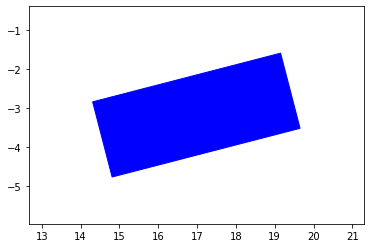

In [ ]:

import os
dirpath = "C:\\Users\\sym02\\Desktop\\Research\\Extension\\codes\\copy_test"
def plot_every_pic(pos_X,pos_Y,pso_Psi,x_area,y_area,i):
    plot_car(pos_X[i],pos_Y[i],pso_Psi[i])
    plt.axis('equal')
    plt.xlim((pos_X[i] - x_area, pos_X[i] + x_area))
    plt.ylim((pos_Y[i] - y_area, pos_Y[i] + y_area))
    if not os.path.exists(dirpath+"\\figsave"):
        os.mkdir(dirpath+"\\figsave")
    plt.savefig((dirpath+"\\figsave\{}".format(i)),dpi=600)
plot_every_pic(X,Y,Psi,5,2.8,30)

In [ ]:
a = 'LIlanlan'  #字符串
a = 6
b = []
a = [6,"Lilanlan",35,b] #列表的index是索引值，除了matlab，其余的索引都是从0开始的
print(a[3])

[]


In [ ]:
dict1 = {}
dict1["lilanlan"] = 6 #键值对对应
dict1[8] = "lilanlan"
dict1["lilanlan"]
lilanlan = 8
a = lilanlan
print(a)

6
8


In [ ]:
b = [i for i in range(101)]
a = [i for i in range(101)]
dict2 = {}
for i in range(100):
    dict2[b[i]] = a[i]

In [ ]:
import numpy as np
a = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

1.下载vscode，下载anaconda
2.建立虚拟环境
3.在vscode中的虚拟python环境中装一个jupyter notebook

给一个cpa会计的知识点，用python的函数实现这个计算接口

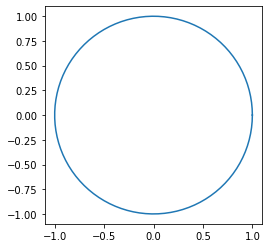

[ 1.          0.99798668  0.99195481  0.9819287   0.9679487   0.95007112
  0.92836793  0.90292654  0.87384938  0.84125353  0.80527026  0.76604444
  0.72373404  0.67850941  0.63055267  0.58005691  0.52722547  0.47227107
  0.41541501  0.35688622  0.29692038  0.23575894  0.17364818  0.1108382
  0.04758192 -0.01586596 -0.07924996 -0.14231484 -0.20480667 -0.26647381
 -0.32706796 -0.38634513 -0.44406661 -0.5        -0.55392006 -0.60560969
 -0.65486073 -0.70147489 -0.74526445 -0.78605309 -0.82367658 -0.85798341
 -0.88883545 -0.91610846 -0.93969262 -0.95949297 -0.97542979 -0.98743889
 -0.99547192 -0.99949654 -0.99949654 -0.99547192 -0.98743889 -0.97542979
 -0.95949297 -0.93969262 -0.91610846 -0.88883545 -0.85798341 -0.82367658
 -0.78605309 -0.74526445 -0.70147489 -0.65486073 -0.60560969 -0.55392006
 -0.5        -0.44406661 -0.38634513 -0.32706796 -0.26647381 -0.20480667
 -0.14231484 -0.07924996 -0.01586596  0.04758192  0.1108382   0.17364818
  0.23575894  0.29692038  0.35688622  0.41541501  0.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个新的图形
fig, ax = plt.subplots()

# 定义圆的参数
center_x = 0.0
center_y = 0.0
radius = 1.0

# 创建一个表示圆的数组
theta = np.linspace(0, 2*np.pi, 100)
x = center_x + radius * np.cos(theta)
y = center_y + radius * np.sin(theta)

# 绘制圆
ax.plot(x, y)

# 为了保证图形是圆形而不是椭圆，需要设置相等的比例
ax.set_aspect('equal', 'box')

# 显示图形
plt.show()
print(x)


In [ ]:
import numpy as np
np.where(np.vstack((np.arange(1,2605),np.arange(2,2606))) - np.array([[4],[7]]) == 2206)

(array([0, 1], dtype=int64), array([2209, 2211], dtype=int64))

In [ ]:
d = np.linalg.norm(np.array([1,2])-np.array([5,6]),ord=2)
d

5.656854249492381

import matplotlib.pyplot as plt
plt.Circle((center_x, center_y), radius, color='blue')

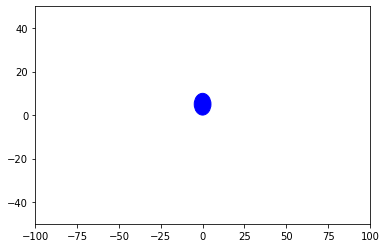

In [ ]:
import matplotlib.pyplot as plt

circle = plt.Circle((0, 5), 5, color='blue')

# 添加圆到图像
fig, ax = plt.subplots() 
plt.xlim((-100,100))
plt.ylim((-50,50))
ax.add_patch(circle)

In [ ]:
#!/usr/bin/env python

# Copyright (c) 2018 Intel Labs.
# authors: German Ros (german.ros@intel.com)
#
# This work is licensed under the terms of the MIT license.
# For a copy, see <https://opensource.org/licenses/MIT>.

""" This module contains PID controllers to perform lateral and longitudinal control. """

from collections import deque
import math

import numpy as np
import pandas as pd

import carla
from agents.tools.misc import get_speed
from config import cfg


def euclidean_distance(v1, v2):
    return math.sqrt(sum([(a - b) ** 2 for a, b in zip(v1, v2)]))


class VehiclePIDController:
    """
    VehiclePIDController is the combination of two PID controllers (lateral and longitudinal) to perform the
    low level control a vehicle from client side
    """

    def __init__(self, vehicle, args_lateral=None, args_longitudinal=None):
        """
        :param vehicle: actor to apply to local planner logic onto
        :param args_lateral: dictionary of arguments to set the lateral PID controller using the following semantics:
                             K_P -- Proportional term
                             K_D -- Differential term
                             K_I -- Integral term
        :param args_longitudinal: dictionary of arguments to set the longitudinal PID controller using the following
        semantics:
                             K_P -- Proportional term
                             K_D -- Differential term
                             K_I -- Integral term
        """
        if not args_lateral:
            args_lateral = {'K_P': 0.3, 'K_D': 0.0, 'K_I': 0.0}
        if not args_longitudinal:
            args_longitudinal = {'K_P': 40.0, 'K_D': 0.1, 'K_I': 4}

        self._vehicle = vehicle
        self._lon_controller = PIDLongitudinalController(self._vehicle, **args_longitudinal)
        self._lat_controller = PIDLateralController(self._vehicle, **args_lateral)

    def reset(self):
        self._lon_controller.reset()
        self._lat_controller.reset()
        control = carla.VehicleControl()
        control.steer = 0.0
        control.throttle = 0.0
        control.brake = 1.0
        control.hand_brake = True
        control.manual_gear_shift = False
        self._vehicle.apply_control(control)

    def run_step(self, target_speed, waypoint):
        """
        Execute one step of control invoking both lateral and longitudinal PID controllers to reach a target waypoint
        at a given target_speed.

        :param target_speed: desired vehicle speed
        :param waypoint: target location encoded as a waypoint
        :return: distance (in meters) to the waypoint
        """
        throttle, speed = self._lon_controller.run_step(target_speed)
        steering = self._lat_controller.run_step(waypoint)
        control = carla.VehicleControl()
        control.steer = steering
        control.throttle = throttle
        control.brake = 0.0
        control.hand_brake = False
        control.manual_gear_shift = False

        return control

    def run_step_2_wp(self, target_speed, waypoint1, waypoint2):
        """
        Execute one step of control invoking both lateral and longitudinal PID controllers to reach a target waypoint
        at a given target_speed.

        :param target_speed: desired vehicle speed
        :param waypoint: target location encoded as a waypoint
        :return: distance (in meters) to the waypoint
        """
        throttle, speed = self._lon_controller.run_step(target_speed)
        steering = self._lat_controller.run_step_2_wp(waypoint1, waypoint2)
        control = carla.VehicleControl()
        control.steer = steering
        control.throttle = throttle
        control.brake = 0.0
        control.hand_brake = False
        control.manual_gear_shift = False

        return control


class PIDLongitudinalController:
    """
    PIDLongitudinalController implements longitudinal control using a PID.
    """

    def __init__(self, vehicle, K_P=10.0, K_D=0.0, K_I=0.0):
        """
        :param vehicle: actor to apply to local planner logic onto
        :param K_P: Proportional term
        :param K_D: Differential term
        :param K_I: Integral term
        :param dt: time differential in seconds
        """
        self._vehicle = vehicle
        self._K_P = K_P
        self._K_D = K_D
        self._K_I = K_I
        if float(cfg.CARLA.DT) > 0:
            self.dt = float(cfg.CARLA.DT)
        else:
            self.dt = 0.05
        self._e_buffer = deque(maxlen=10)

    def reset(self):
        self._e_buffer = deque(maxlen=10)

    def run_step(self, target_speed):
        """
        Execute one step of longitudinal control to reach a given target speed.

        :param target_speed: target speed in m/s
        :return: throttle control in the range [0, 1]
        """
        current_speed = get_speed(self._vehicle)

        return self._pid_control(target_speed, current_speed), current_speed

    def _pid_control(self, target_speed, current_speed):
        """
        Estimate the throttle of the vehicle based on the PID equations

        :param target_speed:  target speed in m/s
        :param current_speed: current speed of the vehicle in Km/h
        :return: throttle control in the range [0, 1]
        """
        _e = (target_speed - current_speed)
        self._e_buffer.append(_e)

        if len(self._e_buffer) >= 2:
            _de = (self._e_buffer[-1] - self._e_buffer[-2]) / self.dt
            _ie = sum(self._e_buffer) * self.dt
        else:
            _de = 0.0
            _ie = 0.0

        return np.clip((self._K_P * _e) + (self._K_D * _de / self.dt) + (self._K_I * _ie * self.dt), 0.0, 1.0)


class PIDLateralController:
    """
    PIDLateralController implements lateral control using a PID.
    """

    def __init__(self, vehicle, K_P=0.2, K_D=0.0, K_I=0.0):
        """
        :param vehicle: actor to apply to local planner logic onto
        :param K_P: Proportional term
        :param K_D: Differential term
        :param K_I: Integral term
        :param dt: time differential in seconds
        """
        self._vehicle = vehicle
        self._K_P = K_P
        self._K_D = K_D
        self._K_I = K_I
        if float(cfg.CARLA.DT) > 0:
            self.dt = float(cfg.CARLA.DT)
        else:
            self.dt = 0.05
        self._e_buffer = deque(maxlen=10)

        self.prev_prop = np.nan
        self.prev_prev_prop = np.nan
        self.curr_prop = np.nan
        self.deriv_list = []
        self.deriv_len = 5

    def reset(self):
        self._e_buffer = deque(maxlen=10)

    def run_step(self, waypoint):
        """
        Execute one step of lateral control to steer the vehicle towards a certain waypoin.

        :param waypoint: target waypoint
        :return: steering control in the range [-1, 1] where:
            -1 represent maximum steering to left
            +1 maximum steering to right
        """
        return self._pid_control(waypoint, self._vehicle.get_transform())

    def _pid_control(self, waypoint, vehicle_transform):
        """
        Estimate the steering angle of the vehicle based on the PID equations

        :param waypoint: target waypoint [x, y]
        :param vehicle_transform: current transform of the vehicle
        :return: steering control in the range [-1, 1]
        """
        v_begin = vehicle_transform.location
        v_end = v_begin + carla.Location(x=math.cos(math.radians(vehicle_transform.rotation.yaw)),
                                         y=math.sin(math.radians(vehicle_transform.rotation.yaw)))

        v_vec = np.array([v_end.x - v_begin.x, v_end.y - v_begin.y, 0.0])
        w_vec = np.array([waypoint[0] -
                          v_begin.x, waypoint[1] -
                          v_begin.y, 0.0])
        _dot = math.acos(np.clip(np.dot(w_vec, v_vec) /
                                 (np.linalg.norm(w_vec) * np.linalg.norm(v_vec)), -1.0, 1.0))

        _cross = np.cross(v_vec, w_vec)
        if _cross[2] < 0:
            _dot *= -1.0
        self._e_buffer.append(_dot)
        if len(self._e_buffer) >= 2:
            _de = (self._e_buffer[-1] - self._e_buffer[-2]) / self.dt
            _ie = sum(self._e_buffer) * self.dt
        else:
            _de = 0.0
            _ie = 0.0

        return np.clip((self._K_P * _dot) + (self._K_D * _de /
                                             self.dt) + (self._K_I * _ie * self.dt), -1.0, 1.0)

    def run_step_2_wp(self, waypoint1, waypoint2):
        """
        Execute one step of lateral control to steer the vehicle towards a certain waypoin.

        :param waypoint: target waypoint
        :return: steering control in the range [-1, 1] where:
            -1 represent maximum steering to left
            +1 maximum steering to right
        """
        return self._pid_control_2_wp(waypoint1, waypoint2, self._vehicle.get_transform())

    def _pid_control_2_wp(self, waypoint1, waypoint2, vehicle_transform):
        """
        Estimate the steering angle of the vehicle based on the PID equations

        :param waypoint: target waypoint [x, y]
        :param vehicle_transform: current transform of the vehicle
        :return: steering control in the range [-1, 1]
        """
        v_begin = vehicle_transform.location
        v_end = v_begin + carla.Location(x=math.cos(math.radians(vehicle_transform.rotation.yaw)),
                                         y=math.sin(math.radians(vehicle_transform.rotation.yaw)))

        v_vec = np.array([v_end.x - v_begin.x, v_end.y - v_begin.y, 0.0])
        w_vec = np.array([waypoint2[0] -
                          waypoint1[0], waypoint2[1] -
                          waypoint1[1], 0.0])
        _dot = math.acos(np.clip(np.dot(w_vec, v_vec) /
                                 (np.linalg.norm(w_vec) * np.linalg.norm(v_vec)), -1.0, 1.0))

        _cross = np.cross(v_vec, w_vec)
        if _cross[2] < 0:
            _dot *= -1.0
        self._e_buffer.append(_dot)
        if len(self._e_buffer) >= 2:
            _de = (self._e_buffer[-1] - self._e_buffer[-2]) / self.dt
            _ie = sum(self._e_buffer) * self.dt
        else:
            _de = 0.0
            _ie = 0.0

        return np.clip((self._K_P * _dot) + (self._K_D * _de /
                                             self.dt) + (self._K_I * _ie * self.dt), -1.0, 1.0)


class PIDCrossTrackController:
    """
    PID control for the trajectory tracking
    Acceptable performance: 'K_P': 0.01, 'K_D': 0.01, 'K_I': 0.15,
    """

    def __init__(self, params):
        """
        params: dictionary of PID coefficients
        """
        if float(cfg.CARLA.DT) > 0:
            self.dt = float(cfg.CARLA.DT)
        else:
            self.dt = 0.05
        self.params = params
        self.e_buffer = deque(maxlen=30)  # error buffer; error: deviation from center lane -/+ value

    def reset(self):
        self.e_buffer = deque(maxlen=30)

    def run_step(self, cte):
        """
        cte: a weak definition for cross track error. i.e. cross track error = |cte|
        ***************** modify the code to use dt in correct places ***************
        """
        self.e_buffer.append(cte)
        if len(self.e_buffer) >= 2:
            _de = (self.e_buffer[-1] - self.e_buffer[-2]) / self.dt
            _ie = sum(self.e_buffer) * self.dt
        else:
            _de = 0.0
            _ie = 0.0

        return np.clip((self.params['K_P'] * cte) + (self.params['K_D'] * _de / self.dt)
                       + (self.params['K_I'] * _ie * self.dt), -0.5, 0.5)


class IntelligentDriverModel:
    """
    Intelligent Driver Model (Cruise Control)
    https://arxiv.org/pdf/1909.11538.pdf
    """

    def __init__(self, vehicle, params=None):
        self.vehicle = vehicle

        if params is None:
            self.a_max = 1     # needs tuning (depending on the vehicle dynamics)
            self.delta = 4
            self.T = 1.6
            self.d0 = 2
            self.b = 1.7
        else:
            self.a_max = params['a_max']
            self.delta = params['delta']
            self.T = params['T']
            self.d0 = params['d0']
            self.b = params['b']

        if float(cfg.CARLA.DT) > 0:
            self.dt = float(cfg.CARLA.DT)
        else:
            self.dt = 0.05

    def run_step(self, vd, vehicle_ahead):
        v = get_speed(self.vehicle)

        if vehicle_ahead is None:
            acc_cmd = self.a_max * (1 - (v / vd)**self.delta)
        else:
            loc1 = [vehicle_ahead.get_location().x, vehicle_ahead.get_location().y, vehicle_ahead.get_location().z]
            loc2 = [self.vehicle.get_location().x, self.vehicle.get_location().y, self.vehicle.get_location().z]
            d = euclidean_distance(loc1, loc2)
            v2 = get_speed(vehicle_ahead)
            dv = v - v2

            d_star = self.d0 + max(0, v*self.T + v*dv/(2*math.sqrt(self.b*self.a_max)))

            acc_cmd = self.a_max * (1 - (v / vd)**self.delta - (d_star/d)**2)

        cmdSpeed = get_speed(self.vehicle) + acc_cmd * self.dt

        # if self.vehicle.attributes['role_name'] == 'hero':
        #     print(v, cmdSpeed, acc_cmd)
        #     print([x * 3.6 for x in [cmdSpeed, acc_cmd, v, vd]])
        return cmdSpeed

In [ ]:
import numpy as np
np.rad2deg(0.5235987891470176)

30.000000776284402

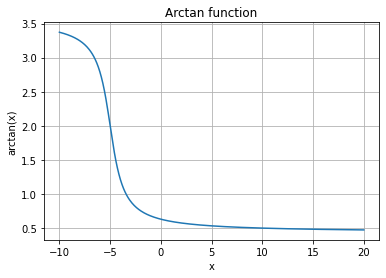

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 20, 400)
y = -np.arctan(x+5) + 2

plt.figure()
plt.plot(x, y)
plt.title("Arctan function")
plt.xlabel("x")
plt.ylabel("arctan(x)")
plt.grid(True)
plt.show()

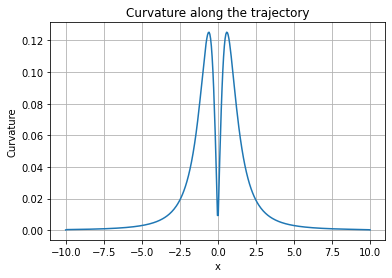

In [ ]:
import numpy as np

def compute_curvature(x, y):
    dx = np.gradient(x)
    dy = np.gradient(y)
    
    ddx = np.gradient(dx)
    ddy = np.gradient(dy)
    
    curvature = np.abs(ddx * dy - dx * ddy) / (dx * dx + dy * dy)**1.5
    return curvature

# 假设x和y是由一系列的点组成的轨迹
x = np.linspace(-10, 10, 400)
y = 0.2*np.arctan(x)

curvature = compute_curvature(x, y)

plt.figure()
plt.plot(x, curvature)
plt.title("Curvature along the trajectory")
plt.xlabel("x")
plt.ylabel("Curvature")
plt.grid(True)
plt.show()


In [ ]:
yaw = [0.9547549982415161, 0.987339563677938, 0.9927198981405583, 0.9981007509299132, 1.003577049907761, 1.0091487087689117, 1.0148156389206915, 1.0204827376237742, 1.0262449236287792, 1.0321021015710157, 1.038040586911219, 1.0439783050004245, 1.0500101588838715, 1.056136037656955, 1.0622608165065497, 1.0684793923806715, 1.0747916484036353, 1.081197465800339, 1.0876017120733144, 1.094099276690348, 1.100690035513746, 1.107373862742966, 1.1140556191037065, 1.1208301875554976, 1.1276974377374764, 1.1345622260437551, 1.1415194313492594, 1.1485689194590012, 1.155710555083887, 1.162849190062191, 1.1700796990847646, 1.177401944178679, 1.18472077481024, 1.1921310636316342, 1.1996326709652423, 1.207225456803136, 1.2148142690545356, 1.2224939792970857, 1.230264447287162, 1.2380305210861793, 1.2458870728303044, 1.2538339632357955, 1.2617760417489094, 1.2698081823097676, 1.2779302478779893, 1.2860470905746328, 1.2942535874656693, 1.3025496050802055, 1.3109350114452711, 1.3193146643549778, 1.3277834471639314, 1.3363412332993432, 1.344892886431543, 1.353533296244335, 1.3622623429661538, 1.3709848975199737, 1.379795857311329, 1.3886951107374208, 1.3975875373463411, 1.4065680436109749, 1.41554151555957, 1.4246028664329597, 1.4337520011889457, 1.442893816633001, 1.4521232371871822, 1.4614401793760474, 1.470749551961705, 1.480146291682269, 1.4896303277353742, 1.499106581889469, 1.5086700042107632, 1.5182255256580226, 1.5278681056710486, 1.5375976966324865, 1.5473192439379373, 1.557127721696549, 1.5669280852936431, 1.5768153189425067, 1.5867894001102716, 1.596755299557279, 1.606808016996341, 1.6168525336139512, 1.3332888973123582, 1.3409617831363987, 1.571196886865785, 1.571148870982899, 1.5711000333413796, 1.571050376968604, 1.570999905080189, 1.5709486210779553, 1.5708965285477374, 1.5708436312570417, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966]

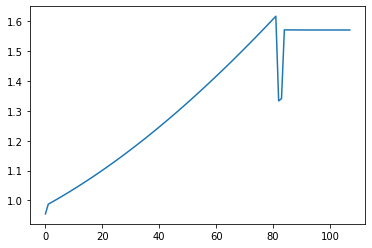

In [ ]:
import matplotlib.pyplot as plt
plt.plot(yaw)

In [ ]:
from collections import deque
deque(maxlen=10)

deque([])

In [ ]:
steer = [0.024104864959972327, 0.16522962780350842, 0.16553170678533144, 0.1658295617614859, 0.16612305394128457, 0.1664120436808615, 0.16669639054477847, 0.16697595342499724, 0.16725059060027148, 0.16752015986358332, 0.16772425643162847, 0.16792212047573518, 0.16811360958372998, 0.1682985812744076, 0.1684768931266066, 0.1686484028899124, 0.16881296860120626, 0.16897044870150785, 0.16912070216335218, 0.16926358862338353, 0.16939896850370698, 0.16952670314957063, 0.16964665495136463, 0.1697586875020952, 0.1698626657294288, 0.16995845601559856, 0.17004592638305188, 0.1701249465999768, 0.17019538834975126, 0.170257125381222, 0.170310033638428, 0.17035399143961352, 0.1703888796072635, 0.17041458163585219, 0.17043098383506985, 0.17043797549298662, 0.17043544903026292, 0.17042330013603513, 0.17040142795265442, 0.170369735204333, 0.17032812836171274, 0.17027651777833655, 0.17021481786617643, 0.17014294721192544, 0.1700608287505474, 0.16996838988848767, 0.16986556265699987, 0.16975228383823138, 0.1696284951169784, 0.16949414318738582, 0.16934917990930706, 0.16919356239201605, 0.16902725315957415, 0.1688502202239815, 0.1686624372132424, 0.16846388346499677, 0.16825454414261531, 0.1680344102923428, 0.1678034789584287, 0.16756175325532882, 0.16730924241823947, 0.16704596189557328, 0.16677193339399474, 0.16648718491730077, 0.1661917508316291, 0.16588567186846528, 0.1655689951846059, 0.1652417743563443, 0.164904069389631, 0.16455594673111137, 0.16419747924887834, 0.16382874622827456, 0.16344983332757634, 0.16306083256380055, 0.16266184225213534, 0.16225296695675404, 0.161834317443692, 0.16140601058592882, 0.1609681693020277, 0.16052092246475314, 0.16006440479650874, 0.15959875676892551, -0.5235987755982988, -0.5235987755982988, 0.0009752583475997584, 0.0008538957197438551, 0.0007318342102217408, 0.0006090782766288772, 0.0004856324246192895, 0.0003615012069791007, 0.00023668922266595894, 0.00011120111581506832, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
t_list= [0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.65, 0.7000000000000001, 0.75, 0.8, 0.8500000000000001, 0.9, 0.9500000000000001, 1.0, 1.05, 1.1, 1.1500000000000001, 1.2000000000000002, 1.25, 1.3, 1.35, 1.4000000000000001, 1.4500000000000002, 1.5, 1.55, 1.6, 1.6500000000000001, 1.7000000000000002, 1.75, 1.8, 1.85, 1.9000000000000001, 1.9500000000000002, 2.0, 2.0500000000000003, 2.1, 2.15, 2.2, 2.25, 2.3000000000000003, 2.35, 2.4000000000000004, 2.45, 2.5, 2.5500000000000003, 2.6, 2.6500000000000004, 2.7, 2.75, 2.8000000000000003, 2.85, 2.9000000000000004, 2.95, 3.0, 3.0500000000000003, 3.1, 3.1500000000000004, 3.2, 3.25, 3.3000000000000003, 3.35, 3.4000000000000004, 3.45, 3.5, 3.5500000000000003, 3.6, 3.6500000000000004, 3.7, 3.75, 3.8000000000000003, 3.85, 3.9000000000000004, 3.95, 4.0, 4.05, 4.1000000000000005, 4.15, 4.2, 4.25, 4.3, 4.3500000000000005, 4.4, 4.45, 4.5, 4.55, 4.6000000000000005, 4.65, 4.7, 4.75, 4.800000000000001, 4.8500000000000005, 4.9, 4.95, 5.0, 5.050000000000001, 5.1000000000000005, 5.15, 5.2, 5.25, 5.300000000000001, 5.3500000000000005]

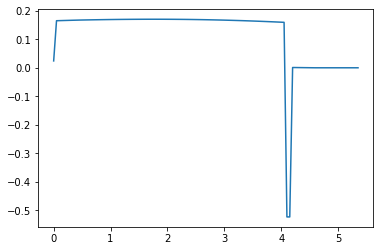

In [ ]:
import matplotlib.pyplot as plt
plt.plot(t_list,steer)

In [ ]:
import numpy as np
np.rad2deg(-0.22696107904167076)

-13.003911942822818

In [ ]:
import random

In [ ]:
vd_L1, vd_L2, vd_L3, vd_L4, vd_L5 = random.uniform(10, 20)

TypeError: cannot unpack non-iterable float object

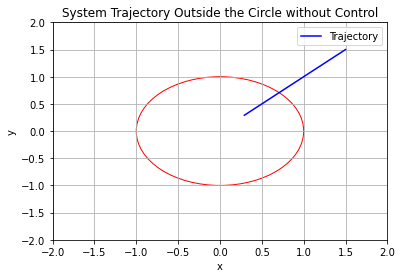

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# System dynamics without control
def dynamics_without_control(x, y, k):
    dx = -k*x
    dy = -k*y
    return dx, dy

# Simulation parameters
dt = 0.01
T = 5
t = np.arange(0, T, dt)
x = [1.5]
y = [1.5]
r = 1
k = 1

for _ in t:
    psi = np.arctan2(-y[-1], -x[-1])
    dx, dy = dynamics_without_control(x[-1], y[-1], k)
    
    # Check if the next state is inside the circle using the ZBF
    if 2 * (dx * np.cos(psi) + dy * np.sin(psi)) >= -k * (x[-1]**2 + y[-1]**2 - r**2):
        x.append(x[-1] + dx*dt)
        y.append(y[-1] + dy*dt)
    else:
        # If it's not safe to move, stay in the same position
        x.append(x[-1])
        y.append(y[-1])

# Plot
plt.figure()
plt.plot(x, y, '-b', label='Trajectory')
circle = plt.Circle((0, 0), r, color='r', fill=False)
plt.gca().add_patch(circle)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('System Trajectory Outside the Circle without Control')
plt.legend()
plt.grid(True)
plt.show()


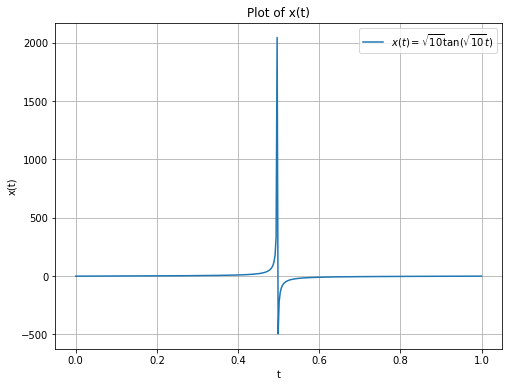

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function x(t)
def x(t):
    return np.sqrt(10) * np.tan(np.sqrt(10) * t)

# Generate t values
t = np.linspace(0, 1, 400)  # we limit t to [0,1] to avoid the function going to infinity
y = x(t)

# Plotting
plt.figure(figsize=(8,6))
plt.plot(t, y, label=r'$x(t) = \sqrt{10} \tan(\sqrt{10}t)$')
plt.title('Plot of x(t)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.show()


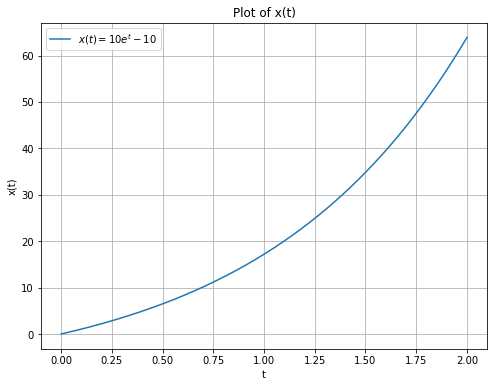

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function x(t)
def x(t):
    return 10*np.exp(t) - 10

# Generate t values
t = np.linspace(0, 2, 400) 
y = x(t)

# Plotting
plt.figure(figsize=(8,6))
plt.plot(t, y, label=r'$x(t) = 10e^{t} - 10$')
plt.title('Plot of x(t)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.show()


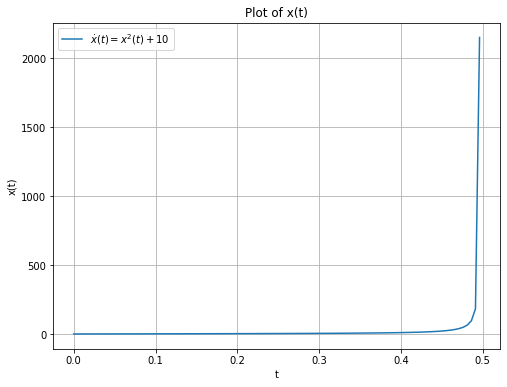

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the differential equation
def dx_dt(t, x):
    return x**2 + 10

# Solve the equation
sol = solve_ivp(dx_dt, [0, 2], [0], t_eval=np.linspace(0, 2, 400))

# Plotting
plt.figure(figsize=(8,6))
plt.plot(sol.t, sol.y[0], label=r'$\dot{x}(t) = x^2(t) + 10$')
plt.title('Plot of x(t)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate x(t)
t_values = np.linspace(0, 2, 400)
x_values = [-10 / (np.tanh(10*t + np.arctanh(1/10))) for t in t_values]

# Plotting
plt.figure(figsize=(8,6))
plt.plot(t_values, x_values, label=r'$x(t) = -\frac{10}{\tanh(10t + \text{atanh}(1/10))}$')
plt.title('Plot of x(t)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.show()


ValueError: 
x(t) = -\frac{10}{\tanh(10t + \text{atanh}(1/10))}
                              ^
ParseSyntaxException: Unknown symbol: \text, found '\'  (at char 30), (line:1, col:31)

<Figure size 576x432 with 1 Axes>

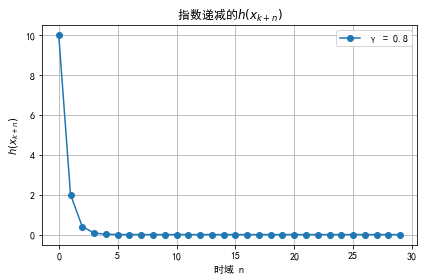

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题


# 定义参数和函数
gamma = 0.8  # 你可以根据需要修改gamma的值
h_initial = 10  # 初始的h(x_k)值
n_steps = 30  # 考虑的时间步或迭代次数

n = np.arange(0, n_steps)
h_values = h_initial * (1-gamma) ** n

# 使用matplotlib绘图
plt.figure(figsize=(6, 4))
plt.plot(n, h_values, '-o', label=f"γ = {gamma}")
plt.title("指数递减的$h(x_{k+n})$")
plt.xlabel("时域 n")
plt.ylabel("$h(x_{k+n})$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
def d_min_clac(vr,vf,rho,a_max_acc,a_max_brake,a_min_brake):
    d_min = max(vr*rho + 0.5*a_max_acc*rho**2 + (vr+rho*a_max_acc)**2/(2*a_min_brake) - vf**2/(2*a_max_brake),0)
    return d_min
def d_min_longitudinal(self,vr,vf):
    d_min = max(vr*self.rho + 0.5*self.a_max_acc_lon*self.rho**2 + (vr+self.rho*self.a_max_acc_lon)**2/(2*self.a_min_brake_lon) - vf**2/(2*self.a_max_brake_lon),0)
    return d_min

In [ ]:
def d_min_clac_1(vr,vf,rho,a_max_acc,a_max_brake,a_min_brake):
    d_min = max(vr*rho - 0.5*a_max_acc*rho**2 + (vr-rho*a_max_acc)**2/(2*a_max_brake) - vf**2/(2*a_min_brake),0)
    return d_min

In [ ]:
def d_min_clac_2(vr,vf,rho,a_max_acc,a_max_brake,a_min_brake):
    d_min = max(vr*rho  + (vr)**2/(2*a_min_brake) - vf**2/(2*a_min_brake),0)
    return d_min

In [ ]:
d_min_clac_2(20,10,0.05,3,3,3)

NameError: name 'd_min_clac_2' is not defined

In [ ]:
d_min_clac_1(15,10,0.05,3,6,3)

NameError: name 'd_min_clac_1' is not defined

In [ ]:
d_min_clac(10,8.94229144745772,0.01,3,6,3)

10.203251972393705

In [ ]:
for i in range(1,5):
    print(i)

1
2
3
4


In [ ]:
def d_min_lateral(mu,rho,a_min_brake_lat,a_max_brake_lat,v1,v2):
    v1_rho = v1 + rho*a_max_brake_lat
    v2_rho = v1 - rho*a_max_brake_lat
    d_min = mu + max((v1 + v1_rho)*rho/2 + v1_rho**2/(2*a_min_brake_lat) - ((v2 + v2_rho)*rho/2 - v2_rho**2/(2*a_min_brake_lat)),0)
    return d_min

In [ ]:
d_min_lateral(0.1,0.1,1,2,1,1)

1.1600000000000001

In [ ]:
import numpy as np

def ellipse_intersection(a, b, xp, yp):
    # 直线方程：y = m*x
    m = yp/xp if xp != 0 else np.inf

    # 代入椭圆方程求交点
    A = (b**2) + (a**2) * (m**2)
    B = 2 * a**2 * m * yp - 2 * b**2 * xp
    C = a**2 * (yp**2 - b**2) + b**2 * xp**2 - (a * b)**2

    delta = B**2 - 4*A*C

    if delta < 0:  # No intersection
        return []

    x1 = (-B + np.sqrt(delta)) / (2 * A)
    y1 = m * x1

    if delta == 0:  # One intersection (tangent)
        return [(x1, y1)]

    x2 = (-B - np.sqrt(delta)) / (2 * A)
    y2 = m * x2

    # Return the closer point to (xp, yp)
    d1 = np.sqrt((x1-xp)**2 + (y1-yp)**2)
    d2 = np.sqrt((x2-xp)**2 + (y2-yp)**2)

    return [(x1, y1)] if d1 < d2 else [(x2, y2)]


def tangent_line(xp, yp, x, y):
    # 直线方程：y - y1 = m(x - x1)
    if x - xp != 0:
        m = (y - yp) / (x - xp)
        b = y - m * x
        return (m, b)
    else:
        return np.inf, xp  # Vertical line


# Test
a, b = 5, 3
xp, yp = 9, 5

intersections = ellipse_intersection(a, b, xp, yp)
if intersections:
    x, y = intersections[0]
    m, b = tangent_line(xp, yp, x, y)
    if m != np.inf:
        print(f"切线方程: y = {m:.2f}x + {b:.2f}")
    else:
        print(f"切线方程: x = {b:.2f}")
else:
    print("没有交点。")



没有交点。


In [ ]:
import numpy as np
from scipy.optimize import minimize

def distance_to_ellipse(x, ellipse_params, point):
    a, b = ellipse_params
    xp, yp = point
    x, y = x
    # 椭圆方程 (x/a)^2 + (y/b)^2 = 1
    ellipse_eq = (x/a)**2 + (y/b)**2 - 1
    # 点到椭圆的距离
    distance = np.sqrt((x - xp)**2 + (y - yp)**2)
    # 使用拉格朗日乘数法
    return distance + ellipse_eq**2 * 1e6

# 椭圆参数
a, b = 5, 3
# 外部点
xp, yp = 7, 8

# 优化
result = minimize(distance_to_ellipse, (xp, yp), args=((a, b), (xp, yp)), bounds=[(-a, a), (-b, b)])
x, y = result.x

print(f"投影点坐标：({x:.2f}, {y:.2f})")


投影点坐标：(3.52, 2.13)


In [ ]:
import time

start = time.time()
# 椭圆参数
a, b = 5, 3
# 外部点
xp, yp = 7, 8

result = minimize(distance_to_ellipse, (xp, yp), args=((a, b), (xp, yp)), bounds=[(-a, a), (-b, b)])
x, y = result.x

end = time.time()

print("Running time: %s seconds"%(end - start))

print(f"投影点坐标：({x:.2f}, {y:.2f})")

Running time: 0.006107330322265625 seconds
投影点坐标：(3.52, 2.13)


In [ ]:
def projection_on_ellipse(x1, y1, a, b):
    def equations(p):
        x, y, lam = p
        eq1 = 2*(x - x1) + 2*lam*a**2*x
        eq2 = 2*(y - y1) + 2*lam*b**2*y
        eq3 = a**2*x**2 + b**2*y**2 - 1
        return [eq1, eq2, eq3]

    # Finding a better initial guess
    initial_guess_point = find_nearest_intersection(x1, y1, a, b)
    initial_guess = (initial_guess_point(0), initial_guess_point(1), 1)
    x, y, _ = fsolve(equations, initial_guess)
    
    return x, y

x1, y1 = 2, 2
a, b = 1, 0.5
x, y = projection_on_ellipse(x1, y1, a, b)
print(f"The projection point on the ellipse is: ({x}, {y})")


TypeError: cannot unpack non-iterable int object

In [ ]:
import numpy as np
from scipy.optimize import fsolve

def initial_guess_point(x1, y1, a, b):
    # 如果x1为0，防止除数为0的情况
    if x1 == 0:
        # y轴上的两个交点
        return (0, b) if y1 > 0 else (0, -b)
    
    # 斜率m
    m = y1 / x1

    # 与椭圆相交的直线方程与椭圆方程组合后的二次方程系数
    A = b**2 + a**2 * m**2
    B = 2 * a**2 * m * x1 - 2 * x1 * b**2
    C = b**2 * x1**2 + a**2 * (x1 * m - y1)**2 - a**2 * b**2

    # 解这个二次方程
    x_values = np.roots([A, B, C])
    
    # 对于每一个x值，找到相应的y值
    y_values = m * (x_values - x1) + y1

    # 选择离给定点更近的解作为初始猜测
    distances = [(x-x1)**2 + (y-y1)**2 for x, y in zip(x_values, y_values)]
    index = np.argmin(distances)
    
    return (x_values[index], y_values[index])

# 示例
x1, y1 = 20,30
a, b = 3, 2
print(initial_guess_point(x1, y1, a, b))


((-7.835051546391754+1.762615280260827j), (-11.75257731958763+2.6439229203912404j))


In [ ]:
import numpy as np

def intersection_point(a, b, h, k, x1, y1):
    # 计算直线的斜率
    m = (y1 - k) / (x1 - h) if x1 != h else float('inf')
    
    if m == float('inf'):
        A = 1
        B = -2*k
        C = k**2 - b**2
        y_values = np.roots([A, B, C])
        x_values = [h, h]
    else:
        # y = mx + c
        c = y1 - m * x1
        
        # 与椭圆相交的直线方程与椭圆方程组合后的二次方程系数
        A = b**2 + a**2 * m**2
        B = 2*a**2*m*c - 2*k*b**2 + 2*h*b**2*m - 2*a**2*m*k
        C = a**2*c**2 + b**2*h**2 + k**2*b**2 - 2*k*b**2*c - a**2*b**2
        
        x_values = np.roots([A, B, C])
        y_values = m * x_values + c
    
    # 计算距离并选择距离最短的点
    distances = [(x-x1)**2 + (y-y1)**2 for x, y in zip(x_values, y_values)]
    index = np.argmin(distances)
    
    return (x_values[index], y_values[index])

# 示例
a, b = 3, 2
h, k = 1, 2  # 椭圆中心
x1, y1 = 8, 9  # 外部点
print(intersection_point(a, b, h, k, x1, y1))


(2.664100588675687, 3.664100588675687)


In [ ]:
import numpy as np

def find_nearest_intersection(a, b, center, external_point):
    # 椭圆方程: (x-h)^2/a^2 + (y-k)^2/b^2 = 1
    # 直线方程: y = mx + c (通过两点形式确定斜率m和截距c)
    h, k = center
    x1, y1 = external_point

    # 计算斜率
    if x1 - h == 0:  # 避免除以零
        m = float('inf')
    else:
        m = (y1 - k) / (x1 - h)

    # 计算截距
    c = y1 - m * x1

    # 将直线方程代入椭圆方程，求交点
    A = 1 + m**2 * (a/b)**2
    B = 2*m*c*a**2/b**2 - 2*a**2*h + 2*h*m**2*a**2/b**2
    C = h**2 + (c-k)**2*a**2/b**2 - 2*c*k*a**2/b**2 - a**2

    # 计算判别式
    discriminant = B**2 - 4*A*C
    if discriminant < 0:
        raise ValueError("No intersection found.")

    x_intersection1 = (-B + np.sqrt(discriminant)) / (2*A)
    x_intersection2 = (-B - np.sqrt(discriminant)) / (2*A)

    y_intersection1 = m * x_intersection1 + c
    y_intersection2 = m * x_intersection2 + c

    intersection1 = (x_intersection1, y_intersection1)
    intersection2 = (x_intersection2, y_intersection2)

    # 计算哪个交点离外部点更近
    dist1 = np.linalg.norm(np.array(intersection1) - np.array(external_point))
    dist2 = np.linalg.norm(np.array(intersection2) - np.array(external_point))

    return intersection1 if dist1 < dist2 else intersection2

# 使用例子
a, b = 3, 2
center = (1, 2)
external_point = (8, 9)
nearest_intersection = find_nearest_intersection(a, b, center, external_point)
print(nearest_intersection)


(3.925406856140576, 4.925406856140576)


In [ ]:
import numpy as np

def find_nearest_intersection(a, b, center, external_point):
    h, k = center
    x1, y1 = external_point

    # 计算斜率
    if x1 - h == 0:  # 避免除以零，这时直线是竖直的
        nearest_x = x1
        if y1 > k:  # 外部点在椭圆的上方
            nearest_y = k + b
        else:  # 外部点在椭圆的下方
            nearest_y = k - b
        return nearest_x, nearest_y

    m = (y1 - k) / (x1 - h)
    c = y1 - m * x1

    # 使用椭圆的参数方程
    theta = np.linspace(0, 2 * np.pi, 1000)
    x = h + a * np.cos(theta)
    y = k + b * np.sin(theta)

    # 计算这些点在直线上的y值
    y_line = m * x + c

    # 找到y值与直线上y值最接近的点，这就是交点
    idx = np.argmin(np.abs(y - y_line))
    intersection_x = x[idx]
    intersection_y = y[idx]

    return intersection_x, intersection_y

# 使用例子
a, b = 3, 2
center = (1, 2)
external_point = (9, 20)
nearest_intersection = find_nearest_intersection(a, b, center, external_point)
print(nearest_intersection)


(1.8513675822582907, 3.9177733894492994)


In [ ]:
def judge(x,y):
    value= (x-1)**2/9 + (y-2)**2/4
    return value

In [ ]:
judge(1.8513675822582907, 3.9177733894492994)

1.0

In [ ]:
import numpy as np
from scipy.optimize import fsolve

def projection_on_ellipse(a, b, center, external_point):
    h, k = center
    x1, y1 = external_point
    
    def equations(p):
        x, y, lam = p
        eq1 = 2*(x - x1) + 2*lam * (x - h)/a**2
        eq2 = 2*(y - y1) + 2*lam * (y - k)/b**2
        eq3 = eq3 = (x - h)**2/a**2 + (y - k)**2/b**2 - 1
        return [eq1, eq2, eq3]
    
    # Finding a better initial guess
    init_x, init_y = find_nearest_intersection(a, b, center, external_point)
    initial_guess = (init_x, init_y, 4)
    x, y, _ = fsolve(equations, initial_guess, xtol=1e-14, maxfev=10000)
    
    return x, y

a, b = 3, 2
center = (1, 2)
external_point = (9, 20)
x, y = projection_on_ellipse(a, b, center, external_point)
print(f"The projection point on the ellipse is: ({x}, {y})")


The projection point on the ellipse is: (2.5351321695679605, 3.71831561218894)


In [ ]:
def ellipse_tangent(a, b, center, point_on_ellipse):
    h, k = center
    X, Y = point_on_ellipse
    
    # 切线的斜率
    m = - (b**2 * (X - h)) / (a**2 * (Y - k))
    
    # 使用点斜式表示切线方程
    c = Y - m * X  # 截距
    return m, c

m, c = ellipse_tangent(a, b, center, (x, y))
print(f"The equation of the tangent line is: y = {m}x + {c}")


The equation of the tangent line is: y = -0.3970638219269148x + 4.724924880527466


In [ ]:
judge(2.5351321695679605, 3.71831561218894)

1.0

In [ ]:
def tangent_to_ellipse(a, b, center, point_on_ellipse):
    h, k = center
    X, Y = point_on_ellipse

    coeff_a = a**2 * (Y - k)
    coeff_b = b**2 * (X - h)
    coeff_c = -a**2 * (Y - k) * Y - b**2 * (X - h) * X

    return coeff_a, coeff_b, coeff_c

# 示例
a, b = 3, 2
center = (1, 2)
point_on_ellipse = (2.5351321695679605, 3.71831561218894) # 这是一个示例点，您可以替换为实际点
coeff_a, coeff_b, coeff_c = tangent_to_ellipse(a, b, center, point_on_ellipse)
print(coeff_a, coeff_b, coeff_c)


15.46484050970046 6.140528678271842 -73.07020969767277


In [ ]:
import numpy as np
from scipy.optimize import fsolve

#椭圆中心连接外部点连线在椭圆上的最近交点
#作为输入求解优化问题的initial guess
import numpy as np

def find_nearest_intersection(a, b, center, external_point):
    h, k = center
    x1, y1 = external_point

    # 计算斜率
    if x1 - h == 0:  # 避免除以零，这时直线是竖直的
        nearest_x = x1
        if y1 > k:  # 外部点在椭圆的上方
            nearest_y = k + b
        else:  # 外部点在椭圆的下方
            nearest_y = k - b
        return nearest_x, nearest_y

    m = (y1 - k) / (x1 - h)
    c = y1 - m * x1

    # 为了找到交点，我们需要解以下方程的二次方程：
    # (x - h)^2/a^2 + (m*x + c - k)^2/b^2 = 1
    coeff_x2 = (1/a**2 + m**2/b**2)
    coeff_x = (2*m*(c - k)/b**2 - 2*h/a**2)
    coeff_const = (h**2/a**2 + (c - k)**2/b**2 - 1)

    # 解二次方程
    delta = coeff_x**2 - 4*coeff_x2*coeff_const
    if delta < 0:  # No intersection
        return None

    x_sol1 = (-coeff_x + np.sqrt(delta)) / (2*coeff_x2)
    x_sol2 = (-coeff_x - np.sqrt(delta)) / (2*coeff_x2)

    y_sol1 = m*x_sol1 + c
    y_sol2 = m*x_sol2 + c

    # 判断哪一个解更近
    d1 = (x1 - x_sol1)**2 + (y1 - y_sol1)**2
    d2 = (x1 - x_sol2)**2 + (y1 - y_sol2)**2
    if d1 < d2:
        return x_sol1, y_sol1
    else:
        return x_sol2, y_sol2


#得到投影点
def projection_on_ellipse(a, b, center, external_point):
    h, k = center
    x1, y1 = external_point
    
    def equations(p):
        x, y, lam = p
        eq1 = 2*(x - x1) + 2*lam * (x - h)/a**2
        eq2 = 2*(y - y1) + 2*lam * (y - k)/b**2
        eq3 = (x - h)**2/a**2 + (y - k)**2/b**2 - 1
        return [eq1, eq2, eq3]
    
    # Finding a better initial guess
    init_x, init_y = find_nearest_intersection(a, b, center, external_point)
    initial_guess = (init_x, init_y, 1)
    x, y, _ = fsolve(equations, initial_guess, xtol=1e-13, maxfev=10000)
    
    return x, y

#得到经过椭圆上交点的椭圆切线
def tangent_to_ellipse(a, b, center, point_on_ellipse):
    h, k = center
    X, Y = point_on_ellipse

    coeff_a = b**2 * (X - h)
    coeff_b = a**2 * (Y - k)
    coeff_c = b**2 * (h**2 - h*X) + a**2 * (k**2 - k*Y) - a**2 * b**2 * 1

    return coeff_a, coeff_b, coeff_c

In [ ]:
a, b = 3, 2
center = (1, 2)

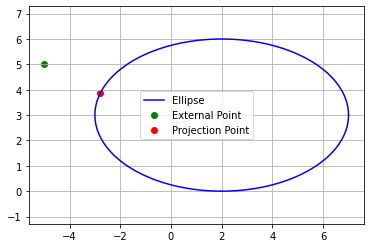

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_ellipse_and_external_point(center, a, b, external_point, projection_point):
    # 解构椭圆中心和外部点的坐标
    h, k = center
    x1, y1 = external_point
    x2, y2 = projection_point

    # 生成椭圆上的点
    theta = np.linspace(0, 2 * np.pi, 1000)
    x = h + a * np.cos(theta)
    y = k + b * np.sin(theta)

    # 绘制椭圆
    plt.plot(x, y, label='Ellipse', color='blue')

    # 绘制外部点
    plt.scatter(x1, y1, color='green', label='External Point')
    
    plt.scatter(x2, y2, color='red', label='Projection Point')
    
    # 设置图例
    plt.legend()

    # 显示图像
    plt.axis('equal')  # 设置等比例坐标轴，这样椭圆不会被压缩或拉伸
    plt.grid(True)
    plt.show()

# 示例
center = (2, 3)
a = 5
b = 3
external_point = (-5, 5)
projection_point = projection_on_ellipse(a, b, center, external_point)
plot_ellipse_and_external_point(center, a, b, external_point, projection_point)


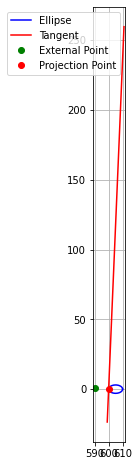

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 您的函数：projection_on_ellipse 和 tangent_to_ellipse

# ... [省略] ...

def plot_ellipse_and_tangent(a, b, center, external_point):
    # 获取在椭圆上的投影点
    x_proj, y_proj = projection_on_ellipse(a, b, center, external_point)

    # 获取经过该点的椭圆的切线的系数
    coeff_a, coeff_b, coeff_c = tangent_to_ellipse(a, b, center, (x_proj, y_proj))

    # 计算切线方程 y = (-coeff_a * x - coeff_c) / coeff_b
    x_vals = np.linspace(center[0] - a - 1, center[0] + a + 1, 400)
    y_vals = (-coeff_a * x_vals - coeff_c) / coeff_b

    # 绘图
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # 绘制椭圆
    theta = np.linspace(0, 2 * np.pi, 1000)
    x = center[0] + a * np.cos(theta)
    y = center[1] + b * np.sin(theta)
    ax.plot(x, y, label='Ellipse', color='blue')

    # 绘制切线
    ax.plot(x_vals, y_vals, label='Tangent', color='red')

    # 绘制外部点
    ax.plot(external_point[0], external_point[1], 'go', label='External Point')

    # 绘制椭圆上的投影点
    ax.plot(x_proj, y_proj, 'ro', label='Projection Point')

    ax.set_aspect('equal', 'box')
    ax.legend()
    plt.grid(True)
    plt.show()

# 示例
center = (605, 0)
a = 5
b = 3
external_point = (590, 0.5)
plot_ellipse_and_tangent(a, b, center, external_point)


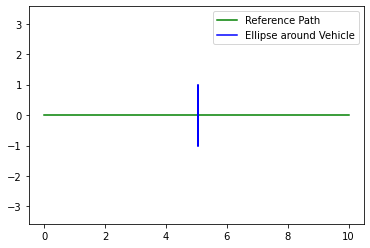

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def frenet_to_cartesian(s, ey, path_x, path_y, path_yaw):
    x = path_x + ey * np.sin(path_yaw)
    y = path_y - ey * np.cos(path_yaw)
    return x, y

# 设置参考路径 (在这里是一条直线)
path_x = np.linspace(0, 10, 100)
path_y = np.zeros_like(path_x)
path_yaw = np.zeros_like(path_x) # 方向是东/右方

# 椭圆的参数
l = 2.0
d = 1.0
sc = 5  # s的中心值
eyc = 0 # ey的中心值

# 生成椭圆上的点
theta = np.linspace(0, 2*np.pi, 100)
s_values = sc + l * np.cos(theta)
ey_values = eyc + d * np.sin(theta)

# 转换到笛卡尔坐标系
x_values, y_values = frenet_to_cartesian(s_values, ey_values, path_x[int(len(path_x)/2)], path_y[int(len(path_y)/2)], path_yaw[int(len(path_yaw)/2)])

# 绘制
plt.plot(path_x, path_y, 'g-', label='Reference Path')
plt.plot(x_values, y_values, 'b-', label='Ellipse around Vehicle')
plt.axis('equal')
plt.legend()
plt.show()


In [ ]:
import numpy as np
x = [1,2,3,4,5,6]
y = [1,2,3,4,5,6]
x_ = np.zeros((6,2))
x_[:,0] = x
x_[:,1] = y

In [ ]:
x_

array([[1., 1.],
       [2., 2.],
       [3., 3.],
       [4., 4.],
       [5., 5.],
       [6., 6.]])

In [ ]:
import math
import sys
sys.path.append(r"C:\Users\sym02\Desktop\Research\Extension\codes\copy_test") 
import matplotlib.pyplot as plt
import numpy as np
from Control.utils import normalize_angle

class Path:

    def __init__(self, l1, l2, r, traslx=0, trasly=0):
        self.l1 = l1
        self.l2 = l2
        self.r = r
        self.traslx = traslx
        self.trasly = trasly

    def __call__(self, s): #返回x与y的坐标轴
        s = float(s)
        completed_lap = 0
        #print(s)
        while s >= 2*self.l1 + 2*self.r*math.pi + 2*self.l2:
            completed_lap += 1 # 完成了一圈
            s = s - (2*self.l1 + 2*self.r*math.pi + 2*self.l2)
        while s<0: #不知道这是一种什么样的状况,可能初始的时刻范围给了负值
            s = s + (2*self.l1 + 2*self.r*math.pi + 2*self.l2)
        # first edge 第一段直线路径
        if s>=0 and s<self.l1:
            label_s = "edge1"
            return (s + self.traslx , 0. + self.trasly)
        # first arc  第一段弧线路径
        elif s>=self.l1 and s< self.l1 + 2*self.r*math.pi/4:
            label_s = "arc1"
            arc = s - self.l1
            alpha = arc/self.r
            return (self.l1 + self.r*math.sin(alpha) + self.traslx , self.r - self.r*math.cos(alpha) + self.trasly)
        # second edge 第二段直线路径
        elif s>= self.l1 + 2*self.r*math.pi/4 and s< self.l1 + 2*self.r*math.pi/4 + self.l2:
            label_s = "edge2"
            return (self.l1 + self.r  + self.traslx , s - self.l1 - 2*self.r*math.pi/4 + self.r + self.trasly)
        # second arc 第二段弧线路径
        elif s>= self.l1 + 2*self.r*math.pi/4 + self.l2 and s < self.l1 + self.r*math.pi + self.l2:
            label_s = "arc2"
            arc = s - (self.l1 + 2*self.r*math.pi/4 + self.l2)
            alpha = arc/self.r
            return (self.l1 + math.cos(alpha)*self.r + self.traslx , self.r + self.l2 + math.sin(alpha)*self.r + self.trasly)
        # third edge 第三段直线路径
        elif s>= self.l1 + self.r*math.pi + self.l2 and s < 2*self.l1 + self.r*math.pi + self.l2:
            label_s = "edge3"
            return (self.l1 - (s - self.l1 - self.r*math.pi - self.l2) + self.traslx , 2*self.r+self.l2 + self.trasly)
        # third arc
        elif s>= 2*self.l1 + self.r*math.pi + self.l2 and s< 2*self.l1 + self.r*math.pi + self.l2 + 2*self.r*math.pi/4:
            label_s = "arc3"
            arc = s - (2*self.l1 + self.r*math.pi + self.l2)
            alpha = arc/self.r
            return (-math.sin(alpha)*self.r + self.traslx , self.r+ self.l2+self.r*math.cos(alpha) + self.trasly)
        # fourth edge
        elif s>= 2*self.l1 + self.r*math.pi + self.l2 + 2*self.r*math.pi/4 and s< 2*self.l1 + self.r*math.pi + 2*self.l2 + 2*self.r*math.pi/4:
            label_s = "edge4"
            return (-self.r + self.traslx , self.r+ self.l2 - (s-(2*self.l1 + self.r*math.pi + self.l2 + 2*self.r*math.pi/4)) + self.trasly)
        # fourth arc
        elif s>= 2*self.l1 + self.r*math.pi + 2*self.l2 + 2*self.r*math.pi/4 and s< 2*self.l1 + 2*self.r*math.pi + 2*self.l2:
            label_s = "arc4"
            arc = s - (2*self.l1 + self.r*math.pi + 2*self.l2 + 2*self.r*math.pi/4)
            alpha = arc/self.r
            return (-self.r*math.cos(alpha) + self.traslx , self.r- self.r*math.sin(alpha) + self.trasly)
        else:
            Exception("Sbagliato controlla!")
    
    
    
    def start_end_dict(self,path_d):
        ind1 = np.where(path_d==0)[0][0]
        ind2 = np.where(path_d==self.l1)[0][0]
        ind3 = np.where((path_d==self.l1 + 2*self.r*math.pi/4)[0][0])
        ind4 = np.where((path_d==self.l1 + 2*self.r*math.pi/4 + self.l2)[0][0])
        ind5 = np.where((path_d==self.l1 + self.r*math.pi + self.l2)[0][0])
        ind6 = np.where((path_d==2*self.l1 + self.r*math.pi + self.l2)[0][0])
        ind7 = np.where((path_d==2*self.l1 + self.r*math.pi + self.l2 + 2*self.r*math.pi/4)[0][0])
        ind8 = np.where((path_d==2*self.l1 + self.r*math.pi + 2*self.l2 + 2*self.r*math.pi/4)[0][0])
        ind9 = np.where((path_d==2*self.l1 + 2*self.r*math.pi + 2*self.l2)[0][0])
                        
        SD_dict = {"edge1":[ind1,ind2],
                   "arc1":[ind2,ind3],
                   "edge2":[ind3,ind4],
                   "arc2":[ind4,ind5],
                   "edge3":[ind5,ind6],
                   "arc3":[ind6,ind7],
                   "edge4":[ind7,ind8],
                   "arc4":[ind8,ind9]}
        return SD_dict
    
    
    def get_track_frenet_coords(self, x_list, y_list, x0, path_d, ey_label, lane_width):
        
        '''
        输入：
        x0: 目前 ego vehicle 所处位置
        path_d: ego vehicle 所要追踪的车道中心线在 frenet 坐标系下的 s_list
        x_list, y_list: path_d 在笛卡尔坐标系下的坐标列表
        ey_label: 目前 ego vehicle 在 path_d 上 ey的正负标识符号
        lane_width:一条道路的宽度
        
        输出：
        s_now, ey_now: ego vehicle 位于 path_d 的坐标位置
        '''
        
        location, label_s =self.get_cartesian_coords(x0[3],x0[4])
        X_dict, _ = self.get_separated_start_end_XY(path_d,x_list,y_list)
        x_seg = X_dict[label_s]
        x_ind = np.where(x_seg == location[0])
        s_now = path_d[x_ind]
        if ey_label:
            ey_now = lane_width
        else:
            ey_now = -lane_width
        return s_now, ey_now
    
    
    def get_separated_start_end_XY(self,path_d,x_list,y_list):
        SD_dict = self.start_end_dict(path_d)
        X_dict = {}
        Y_dict = {}
        for key, value in SD_dict:
            X_dict[key] = x_list[SD_dict[key][0],SD_dict[key][1]]
            Y_dict[key] = y_list[SD_dict[key][0],SD_dict[key][1]]
        return X_dict, Y_dict
    

#牛逼，有了一个物体的s，l坐标后，根据物体的s，l坐标拿到笛卡尔坐标系下的坐标
    def get_cartesian_coords(self, s, l):
        res= self(s)
        (x1, y1) = res
        theta_r = self.get_theta_r(s)
        x = x1 - np.sin(theta_r)*l
        y = y1 + np.cos(theta_r)*l
        return (x, y)

    def get_k(self, s):
        s = float(s)
        completed_lap = 0
        while s >= 2*self.l1 + 2*self.r*math.pi + 2*self.l2:
            completed_lap += 1
            s = s - (2*self.l1 + 2*self.r*math.pi + 2*self.l2)
        while s<0:
            s = s + (2*self.l1 + 2*self.r*math.pi + 2*self.l2)

        # first edge
        if s>=0 and s<self.l1:
            return 0.
        # first arc
        elif s>=self.l1 and s< self.l1 + 2*self.r*math.pi/4:
            return 1./self.r
        # second edge
        elif s>= self.l1 + 2*self.r*math.pi/4 and s< self.l1 + 2*self.r*math.pi/4 + self.l2:
            return 0.
        # second arc
        elif s>= self.l1 + 2*self.r*math.pi/4 + self.l2 and s < self.l1 + self.r*math.pi + self.l2:
            return 1./self.r
        # third edge
        elif s>= self.l1 + self.r*math.pi + self.l2 and s < 2*self.l1 + self.r*math.pi + self.l2:
            return 0.
        # third arc
        elif s>= 2*self.l1 + self.r*math.pi + self.l2 and s< 2*self.l1 + self.r*math.pi + self.l2 + 2*self.r*math.pi/4:
            return 1./self.r
        # fourth edge
        elif s>= 2*self.l1 + self.r*math.pi + self.l2 + 2*self.r*math.pi/4 and s< 2*self.l1 + self.r*math.pi + 2*self.l2 + 2*self.r*math.pi/4:
            return 0.
        # fourth arc
        elif s>= 2*self.l1 + self.r*math.pi + 2*self.l2 + 2*self.r*math.pi/4 and s< 2*self.l1 + 2*self.r*math.pi + 2*self.l2:
            return 1./self.r
        else:
            Exception("Sbagliato controlla!")

    def get_theta_r(self, s):
        s = float(s)
        completed_lap = 0
        while s >= 2*self.l1 + 2*self.r*math.pi + 2*self.l2:
            completed_lap += 1
            s = s - (2*self.l1 + 2*self.r*math.pi + 2*self.l2)
        while s<0:
            s = s + (2*self.l1 + 2*self.r*math.pi + 2*self.l2)

        # first edge
        if s>=0 and s<self.l1:
            return normalize_angle(0.)
        # first arc
        elif s>=self.l1 and s< self.l1 + 2*self.r*math.pi/4:
            arc = s - self.l1
            alpha = arc/self.r
            return normalize_angle(alpha)
        # second edge
        elif s>= self.l1 + 2*self.r*math.pi/4 and s< self.l1 + 2*self.r*math.pi/4 + self.l2:
            return normalize_angle(math.pi/2)
        # second arc
        elif s>= self.l1 + 2*self.r*math.pi/4 + self.l2 and s < self.l1 + self.r*math.pi + self.l2:
            arc = s - (self.l1 + 2*self.r*math.pi/4 + self.l2)
            alpha = arc/self.r
            return normalize_angle(math.pi/2+alpha)
        # third edge
        elif s>= self.l1 + self.r*math.pi + self.l2 and s < 2*self.l1 + self.r*math.pi + self.l2:
            return normalize_angle(math.pi)
        # third arc
        elif s>= 2*self.l1 + self.r*math.pi + self.l2 and s< 2*self.l1 + self.r*math.pi + self.l2 + 2*self.r*math.pi/4:
            arc = s - (2*self.l1 + self.r*math.pi + self.l2)
            alpha = arc/self.r
            return normalize_angle(math.pi+alpha)
        # fourth edge
        elif s>= 2*self.l1 + self.r*math.pi + self.l2 + 2*self.r*math.pi/4 and s< 2*self.l1 + self.r*math.pi + 2*self.l2 + 2*self.r*math.pi/4:
            return normalize_angle((3/2)*math.pi)
        # fourth arc
        elif s>= 2*self.l1 + self.r*math.pi + 2*self.l2 + 2*self.r*math.pi/4 and s< 2*self.l1 + 2*self.r*math.pi + 2*self.l2:
            arc = s - (2*self.l1 + self.r*math.pi + 2*self.l2 + 2*self.r*math.pi/4)
            alpha = arc/self.r
            return normalize_angle((3/2)*math.pi + alpha)
        else:
            Exception("Sbagliato controlla!")

    def get_len(self):
        return 2*self.l1 + 2*self.r*math.pi + 2*self.l2


path = Path(500, 500, 100,-250,-350)
path1c = Path(500, 500, 101.75,-250,-351.75)
path1 = Path(500, 500, 103.5,-250,-353.5)
path2c = Path(500, 500, 105.25,-250,-355.25)
path2 = Path(500, 500, 107,-250,-357)
path3c = Path(500, 500, 108.75,-250,-358.75)
path3 = Path(500, 500, 110.5,-250,-360.5)

samples = np.arange(0., 2630, 0.01)
samples1c = np.arange(0., 2640., 0.01)
samples1 = np.arange(0., 2660., 0.01)
samples2c = np.arange(0., 2670., 0.01)
samples2 = np.arange(0., 2670., 0.01)
samples3c = np.arange(0., 2720., 0.01)
samples3 = np.arange(0., 2720., 0.01)

coord = []
coord1 = []
coord2 = []
coord3 = []
coord1c = []
coord2c = []
coord3c = []


for s in samples:
    coord += [path(s)]
for s in samples1:
    coord1 += [path1(s)]
for s in samples2:
    coord2 += [path2(s)]
for s in samples3:
    coord3 += [path3(s)]
    

for s in samples1c:
    coord1c += [path1c(s)]
for s in samples2c:
    coord2c += [path2c(s)]
for s in samples3c:
    coord3c += [path3c(s)]

    
x = np.array([c[0] for c in coord])
y = np.array([c[1] for c in coord])

x1 = np.array([c[0] for c in coord1])
y1 = np.array([c[1] for c in coord1])

x2 = np.array([c[0] for c in coord2])
y2 = np.array([c[1] for c in coord2])

x3 = np.array([c[0] for c in coord3])
y3 = np.array([c[1] for c in coord3])

x1c = np.array([c[0] for c in coord1c])
y1c = np.array([c[1] for c in coord1c])

x2c = np.array([c[0] for c in coord2c])
y2c = np.array([c[1] for c in coord2c])

x3c = np.array([c[0] for c in coord3c])
y3c = np.array([c[1] for c in coord3c])

In [ ]:
def transformProj2Orig(s, l, theta_tilde, path):
    
    X = np.zeros_like(s)
    Y = np.zeros_like(s)
    THETA = np.zeros_like(s)
    for i in range(len(s)):
        #print(s[i])
        res = path(s[i])
        #print(res)
        (x1, y1) = res
        theta_r = path.get_theta_r(s[i])
        
        x = x1 - np.sin(theta_r)*l[i]
        y = y1 + np.cos(theta_r)*l[i]
        
        theta = theta_tilde[i] + theta_r
        #print(x, y, theta)
        X[i] = x
        Y[i] = y
        THETA[i] = theta
    return (X, Y, THETA)

def drawObstacles1(obs, path, vehicle_length, vehicle_width):
    obs = transformProj2Orig([obs[0]], [obs[1]], [obs[2]], path)
    h = vehicle_length
    h2 = vehicle_width
    half_edge = vehicle_width/2

    x = obs[0][0]
    y = obs[1][0]
    theta = obs[2][0]
    print('x=',x)
    print('y=',y)
    print('theta=',theta)
    #print(x, y, theta)
    t2 = plt.Polygon([[x+ (1/2)*h*np.cos(theta)- half_edge*np.sin(theta), y+(1/2)*h*np.sin(theta)+ half_edge*np.cos(theta)],  [x + half_edge*np.sin(theta)+(1/2)*h*np.cos(theta), y- half_edge*np.cos(theta)+(1/2)*h*np.sin(theta)], [x + half_edge*np.sin(theta)-(1/2)*h*np.cos(theta), y - half_edge*np.cos(theta)-(1/2)*h*np.sin(theta)]], color='green',zorder=1)
    plt.gca().add_patch(t2)
    t2 = plt.Polygon([[x + half_edge*np.sin(theta)-(1/2)*h*np.cos(theta), y - half_edge*np.cos(theta)-(1/2)*h*np.sin(theta)], [x+ (1/2)*h*np.cos(theta)- half_edge*np.sin(theta), y+(1/2)*h*np.sin(theta)+ half_edge*np.cos(theta)], [x - half_edge*np.sin(theta)-(1/2)*h*np.cos(theta), y+ half_edge*np.cos(theta)-(1/2)*h*np.sin(theta)]], color='green',zorder=1)
    plt.gca().add_patch(t2)
    
    delta = 0.025
    xrange = np.arange(-300, 0, delta)
    yrange = np.arange(-400, -300, delta)
    X, Y = np.meshgrid(xrange,yrange)
    F = ((X-x)**2 / h**2 ) + ((Y-y)**2 / h2**2)
    plt.contour(X, Y, (F), [1], linestyles='dashed', linewidths=0.5, colors='blue',zorder=1)
    plt.axis('equal')

x= -230
y= -347
theta= 3


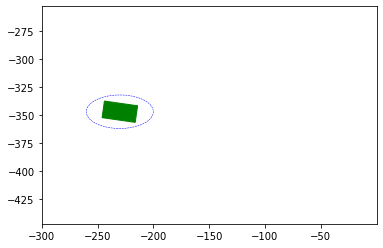

In [ ]:
drawObstacles1([20,2.5,3], path, 30, 15)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def find_nearest_intersection(a, b, center, external_point):
    h, k = center
    x1, y1 = external_point

    # 计算斜率
    if x1 - h == 0:  # 避免除以零，这时直线是竖直的
        nearest_x = x1
        if y1 > k:  # 外部点在椭圆的上方
            nearest_y = k + b
        else:  # 外部点在椭圆的下方
            nearest_y = k - b
        return nearest_x, nearest_y

    m = (y1 - k) / (x1 - h)
    c = y1 - m * x1

    # 为了找到交点，我们需要解以下方程的二次方程：
    # (x - h)^2/a^2 + (m*x + c - k)^2/b^2 = 1
    coeff_x2 = (1/a**2 + m**2/b**2)
    coeff_x = (2*m*(c - k)/b**2 - 2*h/a**2)
    coeff_const = (h**2/a**2 + (c - k)**2/b**2 - 1)

    # 解二次方程
    delta = coeff_x**2 - 4*coeff_x2*coeff_const
    if delta < 0:  # No intersection
        return None

    x_sol1 = (-coeff_x + np.sqrt(delta)) / (2*coeff_x2)
    x_sol2 = (-coeff_x - np.sqrt(delta)) / (2*coeff_x2)

    y_sol1 = m*x_sol1 + c
    y_sol2 = m*x_sol2 + c

    # 判断哪一个解更近
    d1 = (x1 - x_sol1)**2 + (y1 - y_sol1)**2
    d2 = (x1 - x_sol2)**2 + (y1 - y_sol2)**2
    if d1 < d2:
        return x_sol1, y_sol1
    else:
        return x_sol2, y_sol2

#得到投影点
def projection_on_ellipse(a, b, center, external_point):
    h, k = center
    x1, y1 = external_point
    
    def equations(p):
        x, y, lam = p
        eq1 = 2*(x - x1) + 2*lam * (x - h)/a**2
        eq2 = 2*(y - y1) + 2*lam * (y - k)/b**2
        eq3 = eq3 = (x - h)**2/a**2 + (y - k)**2/b**2 - 1
        return [eq1, eq2, eq3]
    
    # Finding a better initial guess
    init_x, init_y = find_nearest_intersection(a, b, center, external_point)
    print('initial guess=',[init_x, init_y])
    initial_guess = (init_x, init_y, 1)
    x, y, _ = fsolve(equations, initial_guess, xtol=1e-13, maxfev=10000)
    
    return x, y
# 已知函数：projection_on_ellipse, tangent_to_ellipse

def tangent_to_ellipse(a, b, center, external_point):
    point_on_ellipse =projection_on_ellipse(a, b, center, external_point)
    h, k = center
    X, Y = point_on_ellipse

    coeff_a = b**2 * (X - h)
    coeff_b = a**2 * (Y - k)
    coeff_c = b**2 * (h**2 - h*X) + a**2 * (k**2 - k*Y) - a**2 * b**2 * 1

    return coeff_a, coeff_b, coeff_c

# 使用上述函数并转换到笛卡尔坐标系
external_point_frenet = (600,0.1)
center_frenet = (620, 0)

# 获取在Frenet坐标系中的投影点
proj_s, proj_l = projection_on_ellipse(4, 2, center_frenet, external_point_frenet)
print([proj_s, proj_l])

# 将投影点转换到笛卡尔坐标系
theta_r_proj = path.get_theta_r(proj_s)
proj_x = x1 - np.sin(theta_r_proj) * proj_l
proj_y = y1 + np.cos(theta_r_proj) * proj_l

# 获取在Frenet坐标系中的切线方程
coeff_a, coeff_b, coeff_c = tangent_to_ellipse(4, 2, center_frenet, external_point_frenet)



initial guess= [616.000199984999, 0.019999000075005213]
[616.0000173008995, 0.005882323008847441]
initial guess= [616.000199984999, 0.019999000075005213]


In [ ]:
find_nearest_intersection(4, 2, (610, 0.1), (620, 0))

(613.9992002399217, 0.060007997600783014)

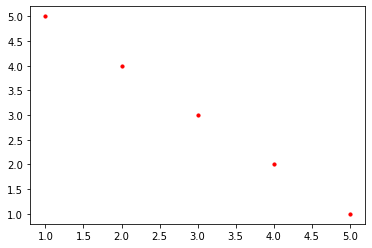

In [ ]:
x_sequence = [1, 2, 3, 4, 5]
y_sequence = [5, 4, 3, 2, 1]

# 创建一个新的图形
plt.figure()

# 使用散点图进行绘制
plt.scatter(x_sequence, y_sequence, color='red', marker='o',s=10)

In [ ]:
def judge(x,y):
    value= (x-541.55)**2/(4.4)**2 + (y-0)**2/(1.9)**2
    return value

In [ ]:
judge(537.51120097, -0.00185063)

0.8425576431658768

In [ ]:
import imageio
def png_count(addr):
    path =  addr
    files = os.listdir(path)   
    num_png = -1     
    for file in files:
        if file.endswith(".png"):
            num_png = num_png + 1
    return num_png


def animation_generation(addr,now_time):
    pic_num = png_count(addr)
    with imageio.get_writer(uri=addr+'\\{}.gif'.format(now_time), mode='I', fps=15) as writer:
        for i in range(pic_num):
            writer.append_data(imageio.imread((addr + "\\{}.png").format(i)))


def Fig_delete(addr):
    path = addr
    for root, dirs, files in os.walk(path):
        for name in files:
            if name.endswith(".png"):             
                os.remove(os.path.join(root, name))
                print("Delete File: " + os.path.join(root, name))

In [ ]:
import time
time_now = int(time.time())
animation_generation(r"C:\Users\sym02\Desktop\Research\Extension\codes\copy_test\figsave",time_now) 

In [ ]:
def transformProj2Orig(s, l, theta_tilde, path):
    '''
    输入：
    s,l,theta_tilde: frenet坐标系下的坐标 
    path:当前的道路
    输出：
    笛卡尔坐标系下的坐标
    '''
    X = [0] * len(s)
    Y = [0] * len(s)
    THETA = [0] * len(s)
    print(THETA)
    for i in range(len(s)):
        res = path(s[i])
        (x1, y1) = res
        theta_r = path.get_theta_r(s[i])
        
        x = x1 - np.sin(theta_r)*l[i]
        y = y1 + np.cos(theta_r)*l[i]
        
        theta = theta_tilde[i] + theta_r
        print("theta_r=",theta_r)
        print("theta_tilde[i]=",theta_tilde[i])
        print("theta=",theta)
        X[i] = x
        Y[i] = y
        THETA[i] = theta
        print("THETA=",THETA)
    return (X, Y, THETA)


In [ ]:
def transformProj2Orig(s, l, theta_tilde, path):
    '''
    输入：
    s,l,theta_tilde: frenet坐标系下的坐标 
    path:当前的道路
    输出：
    笛卡尔坐标系下的坐标
    '''
    X = np.zeros_like(s)
    Y = np.zeros_like(s)
    THETA = np.zeros_like(s)
    print(THETA)
    for i in range(len(s)):
        #print(s[i])
        res = path(s[i])
        #print(res)
        (x1, y1) = res
        theta_r = path.get_theta_r(s[i])
        
        x = x1 - np.sin(theta_r)*l[i]
        y = y1 + np.cos(theta_r)*l[i]
        
        theta = theta_tilde[i] + theta_r
        print("theta_r=",theta_r)
        print("theta_tilde[i]=",theta_tilde[i])
        print("theta=",theta)
        #print(x, y, theta)
        X[i] = x
        Y[i] = y
        THETA[i] = theta
        print("THETA=",THETA)
    return (X, Y, THETA)

In [ ]:
transformProj2Orig([520], [0], [0], path2c)

[0]
theta_r= 0.19002375296912113
theta_tilde[i]= 0
theta= 0.19002375296912113
THETA= [0.19002375296912113]


([269.8798537012568], [-353.3554735696984], [0.19002375296912113])

In [ ]:
import numpy as np

arr = np.zeros_like(520)
print(arr)
arr[0] = 0.19002375296912113
print(arr)


0


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

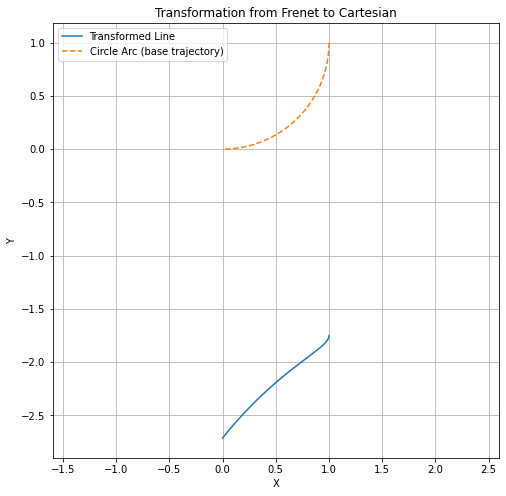

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
R = 1  # Radius of the circle arc
a, b, c = 5, 4, 3

# Frenet to Cartesian transformation function
def frenet_to_cartesian(s, d, R):
    x = R * np.cos(s/R)
    y = R * np.sin(s/R) - R + d
    return x, y

# Generate s values
s_values = np.linspace(0, R * np.pi / 2, 400)

# Calculate d values using the line equation in Frenet frame
d_values = (-a * s_values - c) / b

# Convert Frenet values to Cartesian coordinates
x_values, y_values = frenet_to_cartesian(s_values, d_values, R)

# Plot
plt.figure(figsize=(8, 8))
plt.plot(x_values, y_values, label="Transformed Line")
plt.plot(np.cos(np.linspace(0, np.pi / 2, 400)), 1 - np.sin(np.linspace(0, np.pi / 2, 400)), '--', label="Circle Arc (base trajectory)")
plt.title("Transformation from Frenet to Cartesian")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.axis("equal")
plt.show()


In [ ]:

import math
import sys
sys.path.append(r"C:\Users\sym02\Desktop\Research\Extension\codes\copy_test") 
import matplotlib.pyplot as plt
import numpy as np
from Control.utils import normalize_angle

class Path:

    def __init__(self, l1, l2, r, traslx=0, trasly=0):
        self.l1 = l1
        self.l2 = l2
        self.r = r
        self.traslx = traslx
        self.trasly = trasly

    def __call__(self, s): #返回x与y的坐标轴
        s = float(s)
        completed_lap = 0
        #print(s)
        while s >= 2*self.l1 + 2*self.r*math.pi + 2*self.l2:
            completed_lap += 1 # 完成了一圈
            s = s - (2*self.l1 + 2*self.r*math.pi + 2*self.l2)
        while s<0: #不知道这是一种什么样的状况,可能初始的时刻范围给了负值
            s = s + (2*self.l1 + 2*self.r*math.pi + 2*self.l2)
        # first edge 第一段直线路径
        if s>=0 and s<self.l1:
            label_s = "edge1"
            return (s + self.traslx , 0. + self.trasly)
        # first arc  第一段弧线路径
        elif s>=self.l1 and s< self.l1 + 2*self.r*math.pi/4:
            label_s = "arc1"
            arc = s - self.l1
            alpha = arc/self.r
            return (self.l1 + self.r*math.sin(alpha) + self.traslx , self.r - self.r*math.cos(alpha) + self.trasly)
        # second edge 第二段直线路径
        elif s>= self.l1 + 2*self.r*math.pi/4 and s< self.l1 + 2*self.r*math.pi/4 + self.l2:
            label_s = "edge2"
            return (self.l1 + self.r  + self.traslx , s - self.l1 - 2*self.r*math.pi/4 + self.r + self.trasly)
        # second arc 第二段弧线路径
        elif s>= self.l1 + 2*self.r*math.pi/4 + self.l2 and s < self.l1 + self.r*math.pi + self.l2:
            label_s = "arc2"
            arc = s - (self.l1 + 2*self.r*math.pi/4 + self.l2)
            alpha = arc/self.r
            return (self.l1 + math.cos(alpha)*self.r + self.traslx , self.r + self.l2 + math.sin(alpha)*self.r + self.trasly)
        # third edge 第三段直线路径
        elif s>= self.l1 + self.r*math.pi + self.l2 and s < 2*self.l1 + self.r*math.pi + self.l2:
            label_s = "edge3"
            return (self.l1 - (s - self.l1 - self.r*math.pi - self.l2) + self.traslx , 2*self.r+self.l2 + self.trasly)
        # third arc
        elif s>= 2*self.l1 + self.r*math.pi + self.l2 and s< 2*self.l1 + self.r*math.pi + self.l2 + 2*self.r*math.pi/4:
            label_s = "arc3"
            arc = s - (2*self.l1 + self.r*math.pi + self.l2)
            alpha = arc/self.r
            return (-math.sin(alpha)*self.r + self.traslx , self.r+ self.l2+self.r*math.cos(alpha) + self.trasly)
        # fourth edge
        elif s>= 2*self.l1 + self.r*math.pi + self.l2 + 2*self.r*math.pi/4 and s< 2*self.l1 + self.r*math.pi + 2*self.l2 + 2*self.r*math.pi/4:
            label_s = "edge4"
            return (-self.r + self.traslx , self.r+ self.l2 - (s-(2*self.l1 + self.r*math.pi + self.l2 + 2*self.r*math.pi/4)) + self.trasly)
        # fourth arc
        elif s>= 2*self.l1 + self.r*math.pi + 2*self.l2 + 2*self.r*math.pi/4 and s< 2*self.l1 + 2*self.r*math.pi + 2*self.l2:
            label_s = "arc4"
            arc = s - (2*self.l1 + self.r*math.pi + 2*self.l2 + 2*self.r*math.pi/4)
            alpha = arc/self.r
            return (-self.r*math.cos(alpha) + self.traslx , self.r- self.r*math.sin(alpha) + self.trasly)
        else:
            Exception("Sbagliato controlla!")
    
    
    
    def start_end_dict(self,path_d):
        ind1 = np.where(path_d==0)[0][0]
        ind2 = np.where(path_d==self.l1)[0][0]
        ind3 = np.where((path_d==self.l1 + 2*self.r*math.pi/4)[0][0])
        ind4 = np.where((path_d==self.l1 + 2*self.r*math.pi/4 + self.l2)[0][0])
        ind5 = np.where((path_d==self.l1 + self.r*math.pi + self.l2)[0][0])
        ind6 = np.where((path_d==2*self.l1 + self.r*math.pi + self.l2)[0][0])
        ind7 = np.where((path_d==2*self.l1 + self.r*math.pi + self.l2 + 2*self.r*math.pi/4)[0][0])
        ind8 = np.where((path_d==2*self.l1 + self.r*math.pi + 2*self.l2 + 2*self.r*math.pi/4)[0][0])
        ind9 = np.where((path_d==2*self.l1 + 2*self.r*math.pi + 2*self.l2)[0][0])
                        
        SD_dict = {"edge1":[ind1,ind2],
                   "arc1":[ind2,ind3],
                   "edge2":[ind3,ind4],
                   "arc2":[ind4,ind5],
                   "edge3":[ind5,ind6],
                   "arc3":[ind6,ind7],
                   "edge4":[ind7,ind8],
                   "arc4":[ind8,ind9]}
        return SD_dict
    
    
    def get_track_frenet_coords(self, x_list, y_list, x0, path_d, ey_label, lane_width):
        
        '''
        输入：
        x0: 目前 ego vehicle 所处位置
        path_d: ego vehicle 所要追踪的车道中心线在 frenet 坐标系下的 s_list
        x_list, y_list: path_d 在笛卡尔坐标系下的坐标列表
        ey_label: 目前 ego vehicle 在 path_d 上 ey的正负标识符号
        lane_width:一条道路的宽度
        
        输出：
        s_now, ey_now: ego vehicle 位于 path_d 的坐标位置
        '''
        
        location, label_s =self.get_cartesian_coords(x0[3],x0[4])
        X_dict, _ = self.get_separated_start_end_XY(path_d,x_list,y_list)
        x_seg = X_dict[label_s]
        x_ind = np.where(x_seg == location[0])
        s_now = path_d[x_ind]
        if ey_label:
            ey_now = lane_width
        else:
            ey_now = -lane_width
        return s_now, ey_now
    
    
    def get_separated_start_end_XY(self,path_d,x_list,y_list):
        SD_dict = self.start_end_dict(path_d)
        X_dict = {}
        Y_dict = {}
        for key, value in SD_dict:
            X_dict[key] = x_list[SD_dict[key][0],SD_dict[key][1]]
            Y_dict[key] = y_list[SD_dict[key][0],SD_dict[key][1]]
        return X_dict, Y_dict
    

#牛逼，有了一个物体的s，l坐标后，根据物体的s，l坐标拿到笛卡尔坐标系下的坐标
    def get_cartesian_coords(self, s, l):
        res= self(s)
        (x1, y1) = res
        theta_r = self.get_theta_r(s)
        x = x1 - np.sin(theta_r)*l
        y = y1 + np.cos(theta_r)*l
        return (x, y)

    def get_k(self, s):
        s = float(s)
        completed_lap = 0
        while s >= 2*self.l1 + 2*self.r*math.pi + 2*self.l2:
            completed_lap += 1
            s = s - (2*self.l1 + 2*self.r*math.pi + 2*self.l2)
        while s<0:
            s = s + (2*self.l1 + 2*self.r*math.pi + 2*self.l2)

        # first edge
        if s>=0 and s<self.l1:
            return 0.
        # first arc
        elif s>=self.l1 and s< self.l1 + 2*self.r*math.pi/4:
            return 1./self.r
        # second edge
        elif s>= self.l1 + 2*self.r*math.pi/4 and s< self.l1 + 2*self.r*math.pi/4 + self.l2:
            return 0.
        # second arc
        elif s>= self.l1 + 2*self.r*math.pi/4 + self.l2 and s < self.l1 + self.r*math.pi + self.l2:
            return 1./self.r
        # third edge
        elif s>= self.l1 + self.r*math.pi + self.l2 and s < 2*self.l1 + self.r*math.pi + self.l2:
            return 0.
        # third arc
        elif s>= 2*self.l1 + self.r*math.pi + self.l2 and s< 2*self.l1 + self.r*math.pi + self.l2 + 2*self.r*math.pi/4:
            return 1./self.r
        # fourth edge
        elif s>= 2*self.l1 + self.r*math.pi + self.l2 + 2*self.r*math.pi/4 and s< 2*self.l1 + self.r*math.pi + 2*self.l2 + 2*self.r*math.pi/4:
            return 0.
        # fourth arc
        elif s>= 2*self.l1 + self.r*math.pi + 2*self.l2 + 2*self.r*math.pi/4 and s< 2*self.l1 + 2*self.r*math.pi + 2*self.l2:
            return 1./self.r
        else:
            Exception("Sbagliato controlla!")

    def get_theta_r(self, s):
        s = float(s)
        completed_lap = 0
        while s >= 2*self.l1 + 2*self.r*math.pi + 2*self.l2:
            completed_lap += 1
            s = s - (2*self.l1 + 2*self.r*math.pi + 2*self.l2)
        while s<0:
            s = s + (2*self.l1 + 2*self.r*math.pi + 2*self.l2)

        # first edge
        if s>=0 and s<self.l1:
            return normalize_angle(0.)
        # first arc
        elif s>=self.l1 and s< self.l1 + 2*self.r*math.pi/4:
            arc = s - self.l1
            alpha = arc/self.r
            return normalize_angle(alpha)
        # second edge
        elif s>= self.l1 + 2*self.r*math.pi/4 and s< self.l1 + 2*self.r*math.pi/4 + self.l2:
            return normalize_angle(math.pi/2)
        # second arc
        elif s>= self.l1 + 2*self.r*math.pi/4 + self.l2 and s < self.l1 + self.r*math.pi + self.l2:
            arc = s - (self.l1 + 2*self.r*math.pi/4 + self.l2)
            alpha = arc/self.r
            return normalize_angle(math.pi/2+alpha)
        # third edge
        elif s>= self.l1 + self.r*math.pi + self.l2 and s < 2*self.l1 + self.r*math.pi + self.l2:
            return normalize_angle(math.pi)
        # third arc
        elif s>= 2*self.l1 + self.r*math.pi + self.l2 and s< 2*self.l1 + self.r*math.pi + self.l2 + 2*self.r*math.pi/4:
            arc = s - (2*self.l1 + self.r*math.pi + self.l2)
            alpha = arc/self.r
            return normalize_angle(math.pi+alpha)
        # fourth edge
        elif s>= 2*self.l1 + self.r*math.pi + self.l2 + 2*self.r*math.pi/4 and s< 2*self.l1 + self.r*math.pi + 2*self.l2 + 2*self.r*math.pi/4:
            return normalize_angle((3/2)*math.pi)
        # fourth arc
        elif s>= 2*self.l1 + self.r*math.pi + 2*self.l2 + 2*self.r*math.pi/4 and s< 2*self.l1 + 2*self.r*math.pi + 2*self.l2:
            arc = s - (2*self.l1 + self.r*math.pi + 2*self.l2 + 2*self.r*math.pi/4)
            alpha = arc/self.r
            return normalize_angle((3/2)*math.pi + alpha)
        else:
            Exception("Sbagliato controlla!")

    def get_len(self):
        return 2*self.l1 + 2*self.r*math.pi + 2*self.l2


path = Path(500, 500, 100,-250,-350)
path1c = Path(500, 500, 101.75,-250,-351.75)
path1 = Path(500, 500, 103.5,-250,-353.5)
path2c = Path(500, 500, 105.25,-250,-355.25)
path2 = Path(500, 500, 107,-250,-357)
path3c = Path(500, 500, 108.75,-250,-358.75)
path3 = Path(500, 500, 110.5,-250,-360.5)

samples = np.arange(0., 2630, 0.01)
samples1c = np.arange(0., 2640., 0.01)
samples1 = np.arange(0., 2660., 0.01)
samples2c = np.arange(0., 2670., 0.01)
samples2 = np.arange(0., 2670., 0.01)
samples3c = np.arange(0., 2720., 0.01)
samples3 = np.arange(0., 2720., 0.01)

coord = []
coord1 = []
coord2 = []
coord3 = []
coord1c = []
coord2c = []
coord3c = []


for s in samples:
    coord += [path(s)]
for s in samples1:
    coord1 += [path1(s)]
for s in samples2:
    coord2 += [path2(s)]
for s in samples3:
    coord3 += [path3(s)]
    

for s in samples1c:
    coord1c += [path1c(s)]
for s in samples2c:
    coord2c += [path2c(s)]
for s in samples3c:
    coord3c += [path3c(s)]

    
x = np.array([c[0] for c in coord])
y = np.array([c[1] for c in coord])

x1 = np.array([c[0] for c in coord1])
y1 = np.array([c[1] for c in coord1])

x2 = np.array([c[0] for c in coord2])
y2 = np.array([c[1] for c in coord2])

x3 = np.array([c[0] for c in coord3])
y3 = np.array([c[1] for c in coord3])

x1c = np.array([c[0] for c in coord1c])
y1c = np.array([c[1] for c in coord1c])

x2c = np.array([c[0] for c in coord2c])
y2c = np.array([c[1] for c in coord2c])

x3c = np.array([c[0] for c in coord3c])
y3c = np.array([c[1] for c in coord3c])

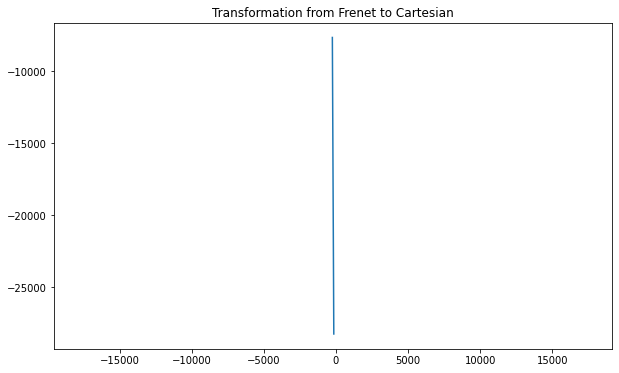

In [ ]:
s_values = np.linspace(0, 100, 400)  # You can adjust the range and density of s-values based on your trajectory.

# Calculate d values using the line equation in Frenet frame
d_values = (-15.883999961476883 * s_values - 565.4703984590749) /  0.07723433432018606

# Convert each (s, d) pair to Cartesian coordinates
x_values, y_values = zip(*[path2c.get_cartesian_coords(s, d) for s, d in zip(s_values, d_values)])

# Plot
plt.figure(figsize=(10, 6))
plt.xlim((-500, 600))
plt.ylim((-350, 350))
plt.plot(x_values, y_values, label="Transformed Line")
plt.title("Transformation from Frenet to Cartesian")
plt.axis("equal")
plt.show()

In [ ]:
a=  -15.870604549224213
b = 1.510362159408816
c =  8500.23685658116
s = 520
ey = (-a*s-c)/b
# s = (-b*ey-c)/a
ey

-163.8828736820672

In [ ]:
def d_min_longitudinal(vr,vf,rho,a_max_acc,a_max_brake,a_min_brake):
    d_min = max(vr*rho + 0.5*a_max_acc*rho**2 + (vr+rho*a_max_acc)**2/(2*a_min_brake) - vf**2/(2*a_max_brake),0)
    return d_min

In [ ]:
d_min_longitudinal(18.0,15.0,0.05,3,6,3)

37.0575

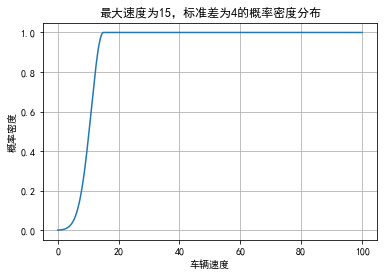

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用宋体或其他支持的字体
plt.rcParams['axes.unicode_minus'] = False

def velocity_probability(V, V_limit, sigma):
    """
    计算车辆速度V的概率密度基于速度限制V_limit和标准差sigma的正态分布。

    参数：
    V: 车辆速度
    V_limit: 速度限制
    sigma: 标准差，控制分布的形状

    返回：
    概率密度值
    """
    if V>=V_limit:
        probability = 1
    else:
        exponent = -((V - V_limit) ** 2) / (2 * sigma ** 2)
        probability = np.exp(exponent)
    return probability

# 示例用法
V_limit = 15  # 速度限制
sigma = 4   # 标准差

# 生成速度范围
V_values = np.linspace(0, 100, 1000)

# 计算每个速度的概率密度
probabilities = [velocity_probability(V, V_limit, sigma) for V in V_values]

# 绘制概率密度曲线
plt.plot(V_values, probabilities)
plt.xlabel('车辆速度')
plt.ylabel('概率密度')
plt.title(f'最大速度为{V_limit}，标准差为{sigma}的概率密度分布')
plt.grid(True)
plt.show()


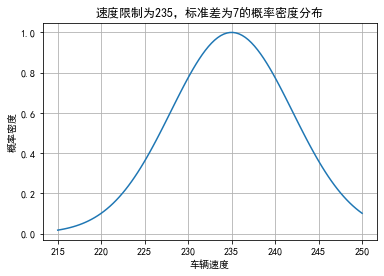

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用宋体或其他支持的字体
plt.rcParams['axes.unicode_minus'] = False

def velocity_probability(X, X_max, sigma):
    """
    计算车辆速度V的概率密度基于速度限制V_limit和标准差sigma的正态分布。

    参数：
    V: 车辆速度
    V_limit: 速度限制
    sigma: 标准差，控制分布的形状

    返回：
    概率密度值
    """
    exponent = -((X - X_max) ** 2) / (2 * sigma ** 2)
    probability = np.exp(exponent)
    return probability

# 示例用法
V_limit = 235  # 速度限制
sigma = 7   # 标准差

# 生成速度范围
V_values = np.linspace(215, 250, 100)

# 计算每个速度的概率密度
probabilities = [velocity_probability(V, V_limit, sigma) for V in V_values]

# 绘制概率密度曲线
plt.plot(V_values, probabilities)
plt.xlabel('车辆速度')
plt.ylabel('概率密度')
plt.title(f'速度限制为{V_limit}，标准差为{sigma}的概率密度分布')
plt.grid(True)
plt.show()


In [ ]:
def linear_scaling(data, min_value, max_value):
    """
    限定范围的线性归一化函数

    参数：
    data: 需要归一化的数据（一维数组或列表）
    min_value: 最小值
    max_value: 最大值

    返回值：
    归一化后的数据，范围在[min_value, max_value]之间
    """
    min_data = min(data)
    max_data = max(data)
    
    normalized_data = [(x - min_data) / (max_data - min_data) * (max_value - min_value) + min_value for x in data]

    return normalized_data



In [ ]:
linear_scaling([200,205,220],0,1)

[0.0, 0.25, 1.0]

In [ ]:
velocity_probability(11, 18, 6)

0.5063356166481006

In [ ]:
velocity_probability(12, 18, 6)

0.6065306597126334

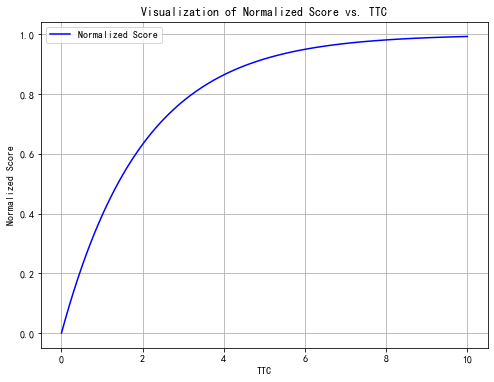

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义TTC范围
TTC_range = np.linspace(0, 10, 100)

# 定义k值
k = 0.5

# 计算normalized_score
normalized_score = 1 - np.exp(-k * TTC_range)

# 绘制图形
plt.figure(figsize=(8, 6))
plt.plot(TTC_range, normalized_score, label='Normalized Score', color='blue')
plt.xlabel('TTC')
plt.ylabel('Normalized Score')
plt.title('Visualization of Normalized Score vs. TTC')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import numpy as np

def sigmoid(TTC, k=1.0):
    return 1 / (1 + np.exp(-k * TTC))

# 示例使用
TTC = np.linspace(-10, 10, 100)
scores = sigmoid(TTC)

print(scores)


[4.53978687e-05 5.55606489e-05 6.79983174e-05 8.32200197e-05
 1.01848815e-04 1.24647146e-04 1.52547986e-04 1.86692945e-04
 2.28478855e-04 2.79614739e-04 3.42191434e-04 4.18766684e-04
 5.12469082e-04 6.27124987e-04 7.67413430e-04 9.39055039e-04
 1.14904229e-03 1.40591988e-03 1.72012560e-03 2.10440443e-03
 2.57431039e-03 3.14881358e-03 3.85103236e-03 4.70911357e-03
 5.75728612e-03 7.03711536e-03 8.59898661e-03 1.05038445e-02
 1.28252101e-02 1.56514861e-02 1.90885420e-02 2.32625358e-02
 2.83228820e-02 3.44451957e-02 4.18339400e-02 5.07243606e-02
 6.13831074e-02 7.41067363e-02 8.92170603e-02 1.07052146e-01
 1.27951705e-01 1.52235823e-01 1.80176593e-01 2.11963334e-01
 2.47663801e-01 2.87185901e-01 3.30246430e-01 3.76354517e-01
 4.24816868e-01 4.74768924e-01 5.25231076e-01 5.75183132e-01
 6.23645483e-01 6.69753570e-01 7.12814099e-01 7.52336199e-01
 7.88036666e-01 8.19823407e-01 8.47764177e-01 8.72048295e-01
 8.92947854e-01 9.10782940e-01 9.25893264e-01 9.38616893e-01
 9.49275639e-01 9.581660

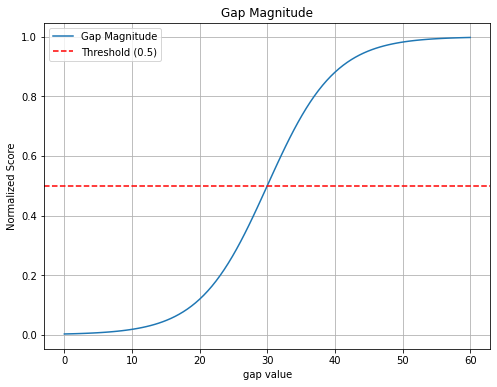

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gap_absolute(g, g_ego,k=0.2):
    return 1 / (1 + np.exp(-k * (g-g_ego)))

# 创建TTC值
TTC = np.linspace(0, 60, 100)

# 计算S形函数的值
scores =  gap_absolute(TTC,30)

# 绘制图形
plt.figure(figsize=(8, 6))
plt.plot(TTC, scores, label='Gap Magnitude')
plt.xlabel('gap value')
plt.ylabel('Normalized Score')
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold (0.5)')
plt.legend()
plt.grid(True)
plt.title('Gap Magnitude')
plt.show()



In [ ]:
def TTC_calc(relative_s,relative_v):
    return relative_s/relative_v

In [ ]:
TTC_calc(235-230,8-10)

-2.5

In [ ]:
def l_diag_clac(l,w):
    return np.sqrt(l*l+w*w)

def gap_clac(psi_diff,l,w):
    return (l_diag_clac(l,w)+5)*psi_diff

In [ ]:
l_diag_clac(3.5,1.75)

3.913118960624632

In [ ]:
gap_clac(np.cos(np.pi/6),3.5,1.75)

7.718987446853684

In [ ]:
np.linalg.norm([2,3])

3.605551275463989

In [ ]:
import numpy as np
from scipy.optimize import fsolve

def find_nearest_intersection1(a, b, center, external_point):
    h, k = center
    x1, y1 = external_point
    
    # 使用NumPy进行向量化计算
    m = np.divide((y1 - k), (x1 - h), out=np.zeros_like(y1 - k), where=(x1 - h) != 0)
    c = y1 - m * x1
    
    coeff_x2 = (1/a**2 + m**2/b**2)
    coeff_x = (2*m*(c - k)/b**2 - 2*h/a**2)
    coeff_const = (h**2/a**2 + (c - k)**2/b**2 - 1)

    delta = coeff_x**2 - 4*coeff_x2*coeff_const
    
    # 保持逻辑清晰并利用NumPy的条件表达式
    no_intersection = delta < 0
    x_sol1 = np.where(no_intersection, 0, (-coeff_x + np.sqrt(delta)) / (2 * coeff_x2))
    x_sol2 = np.where(no_intersection, 0, (-coeff_x - np.sqrt(delta)) / (2 * coeff_x2))
    
    y_sol1 = m * x_sol1 + c
    y_sol2 = m * x_sol2 + c
    
    d1 = (x1 - x_sol1)**2 + (y1 - y_sol1)**2
    d2 = (x1 - x_sol2)**2 + (y1 - y_sol2)**2
    
    return np.where(d1 < d2, (x_sol1, y_sol1), (x_sol2, y_sol2))


In [ ]:
def find_nearest_intersection2(a, b, center, external_point):
    h, k = center
    x1, y1 = external_point

    # 计算斜率
    if x1 - h == 0:  # 避免除以零，这时直线是竖直的
        nearest_x = x1
        if y1 > k:  # 外部点在椭圆的上方
            nearest_y = k + b
        else:  # 外部点在椭圆的下方
            nearest_y = k - b
        return nearest_x, nearest_y

    m = (y1 - k) / (x1 - h)
    c = y1 - m * x1

    # 为了找到交点，我们需要解以下方程的二次方程：
    # (x - h)^2/a^2 + (m*x + c - k)^2/b^2 = 1
    coeff_x2 = (1/a**2 + m**2/b**2)
    coeff_x = (2*m*(c - k)/b**2 - 2*h/a**2)
    coeff_const = (h**2/a**2 + (c - k)**2/b**2 - 1)

    # 解二次方程
    delta = coeff_x**2 - 4*coeff_x2*coeff_const
    if delta < 0:  # No intersection
        return None

    x_sol1 = (-coeff_x + np.sqrt(delta)) / (2*coeff_x2)
    x_sol2 = (-coeff_x - np.sqrt(delta)) / (2*coeff_x2)

    y_sol1 = m*x_sol1 + c
    y_sol2 = m*x_sol2 + c

    # 判断哪一个解更近
    d1 = (x1 - x_sol1)**2 + (y1 - y_sol1)**2
    d2 = (x1 - x_sol2)**2 + (y1 - y_sol2)**2
    if d1 < d2:
        return x_sol1, y_sol1
    else:
        return x_sol2, y_sol2
a = 5.0  # 椭圆的长半轴
b = 3.0  # 椭圆的短半轴
center = (0.0, 0.0)  # 椭圆的中心
external_point = (10.0, 10.0)  # 外部点的坐标

nearest_intersection1 = find_nearest_intersection1(a, b, center, external_point)
nearest_intersection2 = find_nearest_intersection2(a, b, center, external_point)
print(nearest_intersection1)
print(nearest_intersection2)

[2.57247878 2.57247878]
(2.5724787771376323, 2.5724787771376323)


In [ ]:
import cProfile

In [ ]:
start_time = time.time()
for i in range(30):
    nearest_intersection1 = find_nearest_intersection1(a, b, center, external_point)
end_time = time.time()
print("Elapsed Time: {} seconds".format(end_time - start_time))

Elapsed Time: 0.001026153564453125 seconds


In [ ]:
start_time = time.time()
for i in range(30):
     nearest_intersection2 = find_nearest_intersection2(a, b, center, external_point)
end_time = time.time()
print("Elapsed Time: {} seconds".format(end_time - start_time))

Elapsed Time: 0.0010342597961425781 seconds


In [ ]:
find_nearest_intersection1(4, 6, (5,10), (10,20))

TypeError: No loop matching the specified signature and casting was found for ufunc true_divide

In [ ]:
def projection_on_ellipse_inline(a, b, center, external_point):
    h, k = center
    x1, y1 = external_point
    
    def equations(p):
        x, y, lam = p
        eq1 = 2*(x - x1) + 2*lam * (x - h)/a**2
        eq2 = 2*(y - y1) + 2*lam * (y - k)/b**2
        eq3 = eq3 = (x - h)**2/a**2 + (y - k)**2/b**2 - 1
        return [eq1, eq2, eq3]
    def find_nearest_intersection2(a, b, center, external_point):
        h, k = center
        x1, y1 = external_point

        # 计算斜率
        if x1 - h == 0:  # 避免除以零，这时直线是竖直的
            nearest_x = x1
            if y1 > k:  # 外部点在椭圆的上方
                nearest_y = k + b
            else:  # 外部点在椭圆的下方
                nearest_y = k - b
            return nearest_x, nearest_y

        m = (y1 - k) / (x1 - h)
        c = y1 - m * x1

        # 为了找到交点，我们需要解以下方程的二次方程：
        # (x - h)^2/a^2 + (m*x + c - k)^2/b^2 = 1
        coeff_x2 = (1/a**2 + m**2/b**2)
        coeff_x = (2*m*(c - k)/b**2 - 2*h/a**2)
        coeff_const = (h**2/a**2 + (c - k)**2/b**2 - 1)

        # 解二次方程
        delta = coeff_x**2 - 4*coeff_x2*coeff_const
        if delta < 0:  # No intersection
            return None

        x_sol1 = (-coeff_x + np.sqrt(delta)) / (2*coeff_x2)
        x_sol2 = (-coeff_x - np.sqrt(delta)) / (2*coeff_x2)

        y_sol1 = m*x_sol1 + c
        y_sol2 = m*x_sol2 + c

        # 判断哪一个解更近
        d1 = (x1 - x_sol1)**2 + (y1 - y_sol1)**2
        d2 = (x1 - x_sol2)**2 + (y1 - y_sol2)**2
        if d1 < d2:
            return x_sol1, y_sol1
        else:
            return x_sol2, y_sol2   
    # Finding a better initial guess
    init_x, init_y = find_nearest_intersection2(a, b, center, external_point)
    initial_guess = (init_x, init_y, 4)
    x, y, _ = fsolve(equations, initial_guess, xtol=1e-13, maxfev=1000)
    
    return x, y

In [ ]:
projection_on_ellipse_inline(a, b, center, external_point)

(3.9045633171893943, 1.8739206783482651)

In [ ]:
start_time = time.time()
for i in range(10000):
    projection_on_ellipse_inline(a, b, center, external_point)
end_time = time.time()
print("Elapsed Time: {} seconds".format(end_time - start_time))

Elapsed Time: 1.0773615837097168 seconds


In [ ]:
def projection_on_ellipse(a, b, center, external_point):
    h, k = center
    x1, y1 = external_point
    
    def equations(p):
        x, y, lam = p
        eq1 = 2*(x - x1) + 2*lam * (x - h)/a**2
        eq2 = 2*(y - y1) + 2*lam * (y - k)/b**2
        eq3 = eq3 = (x - h)**2/a**2 + (y - k)**2/b**2 - 1
        return [eq1, eq2, eq3]
    
    # Finding a better initial guess
    init_x, init_y = find_nearest_intersection2(a, b, center, external_point)
    initial_guess = (init_x, init_y, 4)
    x, y, _ = fsolve(equations, initial_guess, xtol=1e-13, maxfev=10000)
    
    return x, y

In [ ]:
start_time = time.time()
for i in range(30):
    projection_on_ellipse(a, b, center, external_point)
end_time = time.time()
print("Elapsed Time: {} seconds".format(end_time - start_time))

Elapsed Time: 0.003998994827270508 seconds


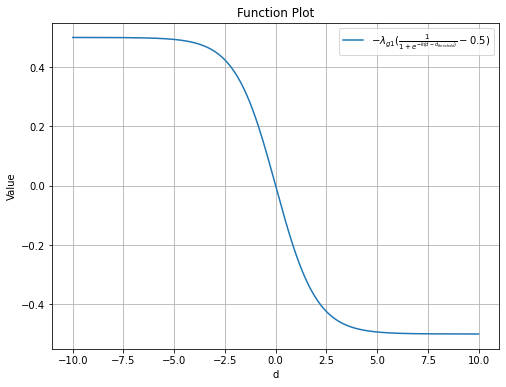

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义参数值
lambda_g1 = 1      # Example value
k = 1              # Example value
d_threshold = 0    # Example value

# 定义函数
def f(d):
    return -lambda_g1 * (1/(1 + np.exp(-k*(d - d_threshold))) - 0.5)

# 生成数据
d = np.linspace(-10, 10, 400)   # You can adjust the range and resolution as needed
y = f(d)

# 绘制图形
plt.figure(figsize=(8, 6))
plt.plot(d, y, label=r"$-\lambda_{g1}(\frac{1}{1+e^{-k(d-d_{threshold})}}-0.5)$")
plt.title("Function Plot")
plt.xlabel("d")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
k= np.array([[1,2],
            [3,4],
            [5,6]])
norms = np.linalg.norm(k, ord=2, axis=1)
z = k / norms[:, np.newaxis]
dot_products = np.dot(z,[0.5,0.5])
y = np.arccos(dot_products)
np.degrees(y)

array([47.86958524, 45.572996  , 45.2348214 ])

In [ ]:
def calculate_angle(row):
    return np.arctan2(row[1], row[0])


np.apply_along_axis(calculate_angle, 1, k)

array([1.10714872, 0.92729522, 0.87605805])

In [ ]:
x = np.array([8,9,5,6])
acute = x < 6
print(acute)
acute_angles = x[acute]
print(acute_angles)
min_acute_index = np.argmin(acute_angles)
print(min_acute_index)
np.arange(x.size)[acute][min_acute_index]

[False False  True False]
[5]
0


2

In [ ]:
l,k = (9,8)

In [ ]:
l

9

In [ ]:
import numpy as np
x = np.array([[1,2,3],
          [4,5,6],
          [7,8,9]])
x[0] = [0,9,8]
x

array([[0, 9, 8],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
class LASCalculator:
    def __init__(self, s_base, k_las, v_max):
        self.s_base = s_base
        self.k_las = k_las
        self.v_max = v_max

    def calculate_LAS(self, v_lt):
        return self.s_base * (1 - np.exp(-self.k_las * (self.v_max - v_lt)))

# 创建一个 LASCalculator 实例
las_calculator = LASCalculator(s_base=30, k_las=0.5, v_max=16)

# 计算 v_lt 范围内的 LAS 值
v_lt_values = np.linspace(10, 30, 100)
las_values = [las_calculator.calculate_LAS(v_lt) for v_lt in v_lt_values]

# 绘制图表
plt.figure(figsize=(10, 6))
plt.plot(v_lt_values, las_values, label="LAS (Class Version)")
plt.xlabel("v_lt")
plt.ylabel("LAS Value")
plt.title("LAS vs. v_lt (Class Version)")
plt.legend()
plt.grid(True)
plt.show()


array([[ 1,  5,  2,  3,  6, 90],
       [ 5,  8,  9,  7,  8,  9]])

In [1]:
import imageio
def png_count(addr):
    path =  addr
    files = os.listdir(path)   
    num_png = -1     
    for file in files:
        if file.endswith(".png"):
            num_png = num_png + 1
    return num_png
def animation_generation(addr,now_time):
    pic_num = png_count(addr)
    with imageio.get_writer(uri=addr+'\\{}.gif'.format(now_time), mode='I', fps=15) as writer:
        for i in range(pic_num):
            writer.append_data(imageio.imread((addr + "\\{}.png").format(i)))
animation_generation(r"C:\Users\sym02\Desktop\Research\Extension\codes\decision_change_rear\figsave",24) 


C:\Users\sym02\AppData\Local\Temp\ipykernel_24276\1850533780.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  writer.append_data(imageio.imread((addr + "\\{}.png").format(i)))


In [ ]:
import math

R = 10  # 曲率为0.1的弯道半径
g = 9.8  # 重力加速度
mu = 0.7  # 干燥沥青的摩擦系数

v = math.sqrt(R * g * mu)
v_mph = v * 2.23694  # 将米/秒转换为英里/小时

v, v_mph


(8.282511696339462, 18.527481714009596)

In [ ]:
a = [5,8,9,3]
a[-1]

3

AttributeError: AnnotationBbox.set() got an unexpected keyword argument 'bbox_transform'

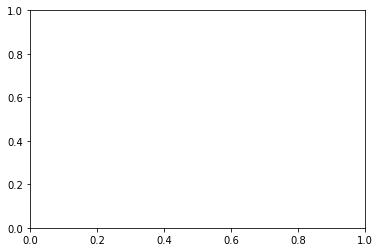

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.transforms as mtransforms

def plot_car(x, y, yaw_rad, car_image, ax=None, length=5.0, width=2.0, color='blue', zoom=0.13):
    if ax is None:
        ax = plt.gca()

    # Convert yaw from radians to degrees
    yaw_deg = np.rad2deg(yaw_rad)
    
    # Create an imagebox containing the car image
    imagebox = OffsetImage(car_image, zoom=zoom)
    
    # Create a transformation that performs the rotation around the center of the car image
    ab_transform = mtransforms.Affine2D().rotate_around(x, y, -yaw_rad)
    
    # Create an annotation box with our transformed imagebox
    ab = AnnotationBbox(imagebox, (x, y), frameon=False,
                        boxcoords="data", pad=0, bbox_transform=ab_transform + ax.transData)
    
    # Add the artist to the axes
    ax.add_artist(ab)

# Usage of the function
car_image = plt.imread("C:\\Users\\sym02\\Desktop\\Research\\Extension\\codes\\controller_improve 2\\figsave\\car2.png")
fig, ax = plt.subplots()
plot_car(0, 0, np.pi/4, car_image, ax=ax)  # Example usage with 45 degrees yaw angle
plt.axis('equal')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_rectangle_and_ellipse(L, W):
    # 中心在原点的长方形坐标
    rectangle = np.array([[-L/2, -W/2],
                          [-L/2, W/2],
                          [L/2, W/2],
                          [L/2, -W/2],
                          [-L/2, -W/2]])

    theta = np.linspace(0, 2 * np.pi, 100)
    a = L / 2  # 半长轴
    b = W / 2  # 半短轴

    # 椭圆公式 x = a*cos(t), y = b*sin(t)
    ellipse_x = a * np.cos(theta)
    ellipse_y = b * np.sin(theta)

    # 绘制长方形
    plt.plot(rectangle[:, 0], rectangle[:, 1], label="Rectangle")
    # 绘制椭圆
    plt.plot(ellipse_x, ellipse_y, label="Ellipse")

    # 设置图形属性
    plt.title("Rectangle and its circumscribing ellipse")
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.axis('equal')
    plt.legend()
    plt.show()

# 设置长方形的长和宽
L = 10  # 长度
W = 6   # 宽度

plot_rectangle_and_ellipse(L, W)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


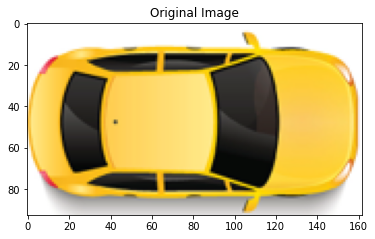

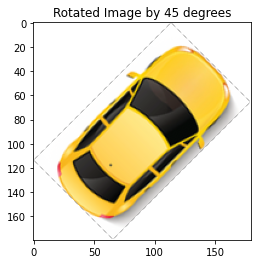

In [ ]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

# Load the image
car_image_path = "C:\\Users\\sym02\\Desktop\\Research\\Extension\\codes\\controller_improve 2\\figsave\\car2.png"
car_image = plt.imread(car_image_path)

# Rotate the image by 45 degrees
rotated_image = rotate(car_image, angle=45, reshape=True)

# Display the original image
plt.figure()
plt.imshow(car_image)
plt.title('Original Image')

# Display the rotated image
plt.figure()
plt.imshow(rotated_image)
plt.title('Rotated Image by 45 degrees')

plt.show()


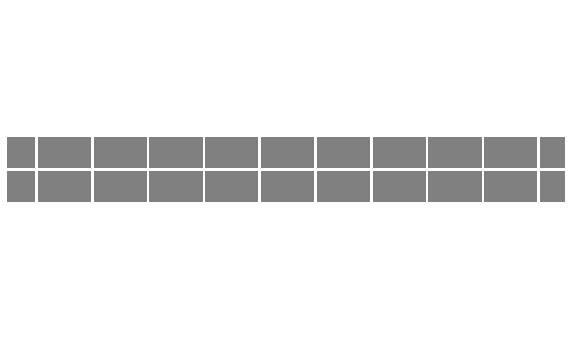

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Draw the road as a large gray rectangle
road = patches.Rectangle((-10, -1), 20, 2, facecolor='gray')
ax.add_patch(road)

# Draw the road center line as a dashed white line
center_line = patches.Rectangle((-10, -0.05), 20, 0.1, facecolor='white', linestyle='--')
ax.add_patch(center_line)

# Optionally, you can add dashed lines to represent lanes
lane_width = 0.1
for i in range(-9, 10, 2):  # adjust range and step to match the length of your road and the number of lanes
    lane_line = patches.Rectangle((i, -1), lane_width, 2, facecolor='white', linestyle='--')
    ax.add_patch(lane_line)

# Set limits to avoid extra whitespace (adjust as needed)
ax.set_xlim(-10, 10)
ax.set_ylim(-5, 5)

# Remove axes
ax.axis('off')

plt.show()


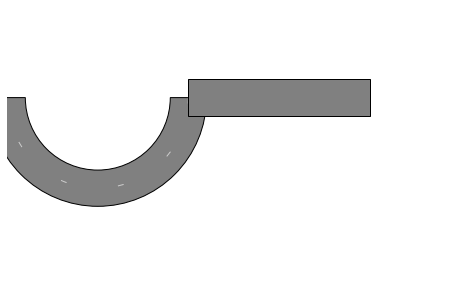

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Function to draw a curved road
def draw_road(ax, start_x, start_y, length, curve_radius, road_width):
    # Calculate the center of the circle for the road curve
    center_x = start_x + curve_radius
    center_y = start_y
    
    # Define the angles for the road curve
    if curve_radius > 0:
        theta1, theta2 = 0, -180
    else:
        theta1, theta2 = -180, 0
    
    # Draw the road as a curved patch
    road = patches.Wedge((center_x, center_y), abs(curve_radius) + road_width/2, theta1, theta2, width=road_width, facecolor='gray', edgecolor='black')
    ax.add_patch(road)

    # Draw the dashed lines
    line_length = 0.3  # Length of dashes
    line_gap = 0.2    # Gap between dashes

    theta = np.radians(np.linspace(180, 0, 50))
    x = center_x + curve_radius * np.cos(theta)
    y = center_y + curve_radius * np.sin(theta)
    
    for i in range(0, len(theta), 10):
        line = patches.Polygon(np.column_stack((x[i:i+2], y[i:i+2])), closed=False, facecolor='none', edgecolor='white', linestyle=(0, (line_length, line_gap)))
        ax.add_patch(line)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Draw a curved road
draw_road(ax, start_x=0, start_y=0, length=10, curve_radius=-5, road_width=2)

# Draw a straight road segment
straight_road = patches.Rectangle((0, -1), 10, 2, facecolor='gray', edgecolor='black')
ax.add_patch(straight_road)

# Set the aspect of the plot to be equal
ax.set_aspect('equal')

# Set limits to match your road layout
ax.set_xlim(-10, 15)
ax.set_ylim(-10, 5)

# Remove axes for a cleaner look
ax.axis('off')

plt.show()


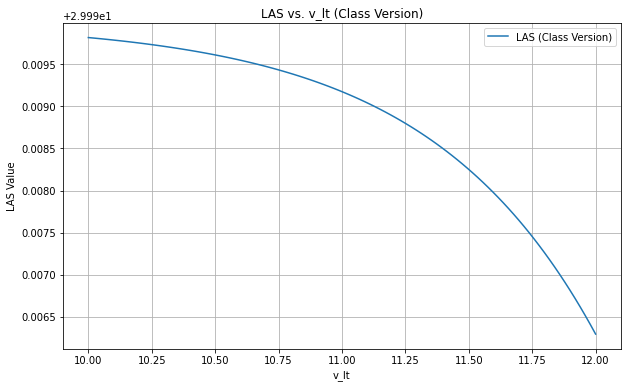

In [ ]:
class LASCalculator:
    def __init__(self, s_base, k_las, v_max):
        self.s_base = s_base
        self.k_las = k_las
        self.v_max = v_max

    def calculate_LAS(self, v_lt):
        return self.s_base*(1-np.exp(-self.k_las*(self.v_max-v_lt)))

# 创建一个 LASCalculator 实例
las_calculator = LASCalculator(s_base=30, k_las=1.5, v_max=18)

# 计算 v_lt 范围内的 LAS 值
v_lt_values = np.linspace(10, 12, 100)
las_values = [las_calculator.calculate_LAS(v_lt) for v_lt in v_lt_values]

# 绘制图表
plt.figure(figsize=(10, 6))
plt.plot(v_lt_values, las_values, label="LAS (Class Version)")
plt.xlabel("v_lt")
plt.ylabel("LAS Value")
plt.title("LAS vs. v_lt (Class Version)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_rectangle_and_ellipse(L, W):
    # 中心在原点的长方形坐标
    rectangle = np.array([[-L/2, -W/2],
                          [-L/2, W/2],
                          [L/2, W/2],
                          [L/2, -W/2],
                          [-L/2, -W/2]])

    theta = np.linspace(0, 2 * np.pi, 100)
    a = L / 2  # 半长轴
    b = W / 2  # 半短轴

    # 椭圆公式 x = a*cos(t), y = b*sin(t)
    ellipse_x = a * np.cos(theta)
    ellipse_y = b * np.sin(theta)

    # 绘制长方形
    plt.plot(rectangle[:, 0], rectangle[:, 1], label="Rectangle")
    # 绘制椭圆
    plt.plot(ellipse_x, ellipse_y, label="Ellipse")

    # 设置图形属性
    plt.title("Rectangle and its circumscribing ellipse")
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.axis('equal')
    plt.legend()
    plt.show()

# 设置长方形的长和宽
L = 10  # 长度
W = 6   # 宽度

plot_rectangle_and_ellipse(L, W)


In [ ]:
class Graph:
    def __init__(self):
        self.graph = defaultdict(list)
    
    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    def find_paths(self, start, end, path=[]):
        if start in path and start != path[-1]:  # 防止回溯到同侧的其他节点
            return []
        path.append(start)
        if start == end:
            return [path.copy()]
        paths = []
        for neighbour in self.graph[start]:
            if neighbour not in path or (neighbour[0] == path[-1][0] and int(neighbour[1]) > int(path[-1][1])):
                new_paths = self.find_paths(neighbour, end, path.copy())  # 使用path的副本进行递归
                for new_path in new_paths:
                    paths.append(new_path)
        return paths

# 初始化图并添加边
g = Graph()
edges = [
    ('L1', 'C1'), ('L1', 'C2'),
    ('C1', 'R1'), ('C1', 'R2'),
    ('C2', 'R1'), ('C2', 'R2'),
    ('L2', 'C1'), ('L2', 'C2'),
]
for u, v in edges:
    g.add_edge(u, v)

# 示例：查找所有从R1到R2的路径
start, end = 'R1', 'R2'
all_paths = g.find_paths(start, end)

# 打印所有找到的路径
for path in all_paths:
    print(" -> ".join(path))



NameError: name 'defaultdict' is not defined

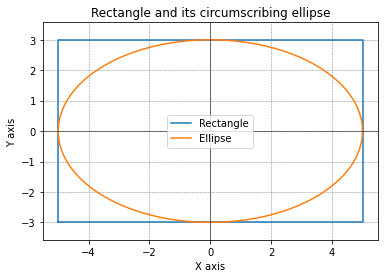

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_rectangle_and_ellipse(L, W):
    # 中心在原点的长方形坐标
    rectangle = np.array([[-L/2, -W/2],
                          [-L/2, W/2],
                          [L/2, W/2],
                          [L/2, -W/2],
                          [-L/2, -W/2]])

    theta = np.linspace(0, 2 * np.pi, 100)
    a = L / 2  # 半长轴
    b = W / 2  # 半短轴

    # 椭圆公式 x = a*cos(t), y = b*sin(t)
    ellipse_x = a * np.cos(theta)
    ellipse_y = b * np.sin(theta)

    # 绘制长方形
    plt.plot(rectangle[:, 0], rectangle[:, 1], label="Rectangle")
    # 绘制椭圆
    plt.plot(ellipse_x, ellipse_y, label="Ellipse")

    # 设置图形属性
    plt.title("Rectangle and its circumscribing ellipse")
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.axis('equal')
    plt.legend()
    plt.show()

# 设置长方形的长和宽
L = 10  # 长度
W = 6   # 宽度

plot_rectangle_and_ellipse(L, W)


d:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24418 (\N{CJK UNIFIED IDEOGRAPH-5F62}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21450 (\N{CJK UNIFIED IDEOGRAPH-53CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20854 (\N{CJK UNIFIED IDEOGRAPH-5176}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\lib\site-packages\IPython\core\pylabtools.p

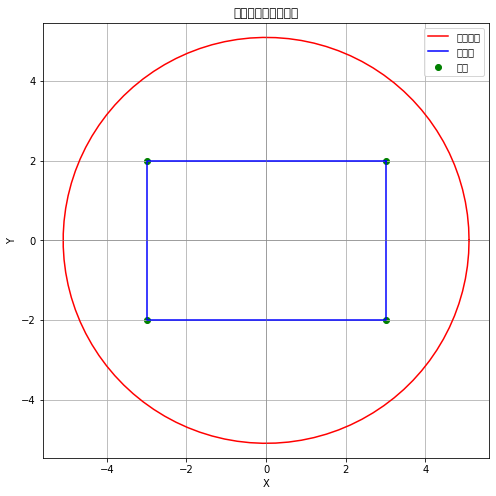

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 设定长方形的长a和宽b
a = 6
b = 4

# 计算外接椭圆的半长轴和半短轴
r_a = np.sqrt((a**2 + b**2) / 2)
r_b = r_a  # 在此情况下，半长轴和半短轴相同，因为外接椭圆是圆形

# 生成椭圆上的点
theta = np.linspace(0, 2 * np.pi, 100)
x_ellipse = r_a * np.cos(theta)
y_ellipse = r_b * np.sin(theta)

# 生成长方形的顶点
x_rectangle = np.array([a/2, a/2, -a/2, -a/2, a/2])
y_rectangle = np.array([b/2, -b/2, -b/2, b/2, b/2])

# 绘图
plt.figure(figsize=(8, 8))
plt.plot(x_ellipse, y_ellipse, 'r-', label='外接椭圆')
plt.plot(x_rectangle, y_rectangle, 'b-', label='长方形')
plt.scatter([a/2, -a/2, a/2, -a/2], [b/2, b/2, -b/2, -b/2], color='green', label='顶点')  # 标记长方形的顶点
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.title('长方形及其外接椭圆')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
def find_all_paths(graph, start, end, path=[], visited_higher={}):
    path.append(start)
    # 标记已访问过的节点方向和编号
    visited_higher[start[0]] = max(visited_higher.get(start[0], 0), int(start[1]))
    
    if start == end:
        print(" -> ".join(path))
        path.pop()
        return

    for node in graph[start]:
        # 如果已经访问过相同方向的更高或相同编号节点，则跳过
        if node[0] in visited_higher and int(node[1]) <= visited_higher[node[0]]:
            continue
        find_all_paths(graph, node, end, path, visited_higher.copy())

    path.pop()

graph = {
    'R1': ['C1', 'C2'],
    'R2': ['C1', 'C2'],
    'C1': ['L1', 'L2', 'R1', 'R2'],
    'C2': ['L1', 'L2', 'R1', 'R2'],
    'L1': ['C1', 'C2'],
    'L2': ['C1', 'C2'],
}

# 示例：查找所有从R1到R2的路径
find_all_paths(graph, 'C1', 'R2', [])


C1 -> L1 -> C2 -> R2
C1 -> L2 -> C2 -> R2
C1 -> R1 -> C2 -> R2
C1 -> R2


In [ ]:
def find_all_paths(graph, start, end, path=None, visited_higher=None):
    if path is None:
        path = []
    if visited_higher is None:
        visited_higher = {}

    path = path + [start]
    visited_higher[start[0]] = max(visited_higher.get(start[0], 0), int(start[1]))

    if start == end:
        return [path]

    paths = []
    for node in graph[start]:
        if node[0] in visited_higher and int(node[1]) <= visited_higher[node[0]]:
            continue
        newpaths = find_all_paths(graph, node, end, path, visited_higher.copy())
        for newpath in newpaths:
            paths.append(newpath)

    return paths

graph = {
    'R1': ['C1', 'C2'],
    'R2': ['C1', 'C2'],
    'C1': ['L1', 'L2', 'R1', 'R2'],
    'C2': ['L1', 'L2', 'R1', 'R2'],
    'L1': ['C1', 'C2'],
    'L2': ['C1', 'C2'],
}

# 示例：查找所有从C1到R2的路径
paths = find_all_paths(graph, 'L1', 'C2')
for path in paths:
    print(path)


['L1', 'C1', 'L2', 'C2']
['L1', 'C1', 'R1', 'C2']
['L1', 'C1', 'R2', 'C2']
['L1', 'C2']


In [ ]:
def find_all_paths(graph, start, end, path=None, visited_higher=None, excluded=None):
    if path is None:
        path = []
    if visited_higher is None:
        visited_higher = {}
    if excluded is None:
        excluded = ['L2']  # 默认排除的节点列表

    path = path + [start]
    visited_higher[start[0]] = max(visited_higher.get(start[0], 0), int(start[1]))

    if start == end:
        return [path]

    paths = []
    for node in graph[start]:
        # 检查当前节点是否被排除
        if node in excluded:
            continue
        if node[0] in visited_higher and int(node[1]) <= visited_higher[node[0]]:
            continue
        newpaths = find_all_paths(graph, node, end, path, visited_higher.copy(), excluded)
        for newpath in newpaths:
            paths.append(newpath)

    return paths
paths = find_all_paths(graph, 'R1', 'C2', excluded=['L2'])
for path in paths:
    print(path)

['R1', 'C1', 'L1', 'C2']
['R1', 'C1', 'R2', 'C2']
['R1', 'C2']


In [ ]:
def risk_assessment(current, target):
    # 示例风险评估逻辑：如果从L1到C1则认为不安全，这里只是一个示例
    if current == 'L1' and target == 'C1':
        return False
    # 默认情况下认为其它转移是安全的
    return True

def find_all_paths(graph, start, end, path=None, visited_higher=None, excluded=None):
    if path is None:
        path = []
    if visited_higher is None:
        visited_higher = {}
    if excluded is None:
        excluded = ['L2']  # 默认排除节点为 L2

    path = path + [start]
    visited_higher[start[0]] = max(visited_higher.get(start[0], 0), int(start[1]))

    if start == end:
        return [path]

    paths = []
    for node in graph[start]:
        if node in excluded or not risk_assessment(start, node):
            print(type(node))
            continue
        if node[0] in visited_higher and int(node[1]) <= visited_higher[node[0]]:
            continue
        newpaths = find_all_paths(graph, node, end, path, visited_higher.copy(), excluded)
        for newpath in newpaths:
            paths.append(newpath)

    return paths

paths = find_all_paths(graph, 'L1', 'C2', excluded=[])
paths

<class 'str'>


[['L1', 'C2']]

In [ ]:
import numpy as np
import copy

class decision:
    def __init__(self,l_diag,l,T_risk,epsilon,k,rho,a_max_acc_lon,a_max_brake_lon,a_min_brake_lon,threshold,d0,Td):
        self.graph = {
        'R1': ['C1', 'C2'],
        'R2': ['C1', 'C2'],
        'C1': ['L1', 'L2', 'R1', 'R2'],
        'C2': ['L1', 'L2', 'R1', 'R2'],
        'L1': ['C1', 'C2'],
        'L2': ['C1', 'C2']}
        
        self.group_list = ['L1', 'L2','C1', 'C2','R1', 'R2']
        
        self.l_diag = l_diag
        self.l = l
        self.T_risk = T_risk
        self.epsilon = epsilon
        self.k = k
        self.rho = rho
        self.a_max_acc_lon = a_max_acc_lon
        self.a_max_brake_lon = a_max_brake_lon
        self.a_min_brake_lon = a_min_brake_lon
        self.group_num = 6
        self.threshold = threshold
        self.d0 = d0
        self.Td = Td
    
    def remove_node_and_links(self, graph,node_to_remove):
        # 如果节点在图中，先移除这个节点
        if node_to_remove in graph:
            del graph[node_to_remove]

        # 遍历图中的所有节点，移除指向被删除节点的链接
        for node, edges in graph.items():
            if node_to_remove in edges:
                graph[node].remove(node_to_remove)
        return graph
        
    def find_all_paths(self, group_dict, graph, start, end, path=None, visited_higher=None, excluded=None, depth=1):

        if path is None:
            path = []
        if visited_higher is None:
            visited_higher = {}

        path = path + [start]
        visited_higher[start[0]] = max(visited_higher.get(start[0], 0), int(start[1]))

        if start == end:
            return [path]

        paths = []
     
        for node in graph[start]:
            # print("start=",start)
            # print("node=",node)
            if node[0] in visited_higher and int(node[1]) <= visited_higher[node[0]]:
                continue             
            if node in excluded or not self.risk_assessment(group_dict, start, node, depth):
                # print("excluded=",excluded)
                # print("self.risk_assessment=",self.risk_assessment(group_dict, start, node, depth))
                continue

            newpaths = self.find_all_paths(group_dict, graph, node, end, path, visited_higher.copy(), excluded, depth + 1)
            for newpath in newpaths:
                paths.append(newpath)

        return paths

In [ ]:
def remove_node_and_links(graph, node_to_remove):
    # 如果节点在图中，先移除这个节点
    if node_to_remove in graph:
        del graph[node_to_remove]

    # 遍历图中的所有节点，移除指向被删除节点的链接
    for node, edges in graph.items():
        if node_to_remove in edges:
            graph[node].remove(node_to_remove)

In [ ]:
graph = {
        'R1': ['C1', 'C2'],
        'R2': ['C1', 'C2'],
        'C1': ['L1', 'L2', 'R1', 'R2'],
        'C2': ['L1', 'L2', 'R1', 'R2'],
        'L1': ['C1', 'C2'],
        'L2': ['C1', 'C2']}

In [ ]:
remove_node_and_links(graph, 'L2')

In [ ]:
graph

{'R1': ['C1', 'C2'],
 'R2': ['C1', 'C2'],
 'C1': ['L1', 'R1', 'R2'],
 'C2': ['L1', 'R1', 'R2'],
 'L1': ['C1', 'C2']}

In [ ]:
projection_s = [3, -1, 0, -4, 5, -2]  # 示例列表

# 找出大于0的元素组成的列表及其索引
positive_elements = [x for x in projection_s if x > 0]
positive_indices = [i for i, x in enumerate(projection_s) if x > 0]

# 找出小于0的元素组成的列表及其索引
negative_elements = [x for x in projection_s if x < 0]
negative_indices = [i for i, x in enumerate(projection_s) if x < 0]

# 大于0中最小的的index和第二小的index
positive_indices_sorted = sorted(positive_indices, key=lambda i: projection_s[i])
positive_min_index = positive_indices_sorted[0] if positive_indices_sorted else None
positive_second_min_index = positive_indices_sorted[1] if len(positive_indices_sorted) > 1 else None

# 小于0中最大的的index
negative_indices_sorted = sorted(negative_indices, key=lambda i: projection_s[i], reverse=True)
negative_max_index = negative_indices_sorted[0] if negative_indices_sorted else None

positive_elements, positive_min_index, positive_second_min_index, negative_elements, negative_max_index


([3, 5], 0, 4, [-1, -4, -2], 1)

In [ ]:
# 假设 projection_s 是已定义的一维列表
projection_s = [-100,-50,-28,-1,5]
# 找出大于0的元素组成的列表及其索引
positive_elements = [x for x in projection_s if x > 0]
positive_indices = [i for i, x in enumerate(projection_s) if x > 0]

# 找出小于0的元素组成的列表及其索引
negative_elements = [x for x in projection_s if x < 0]
negative_indices = [i for i, x in enumerate(projection_s) if x < 0]

# 大于0中最小的的index和第二小的index
if positive_indices:
    positive_indices_sorted = sorted(positive_indices, key=lambda i: projection_s[i])
    leader_index = positive_indices_sorted[0]
    leader2_index = positive_indices_sorted[1] if len(positive_indices_sorted) > 1 else None
else:
    leader_index = None
    leader2_index = None

# 小于0中最大的的index
if negative_indices:
    negative_indices_sorted = sorted(negative_indices, key=lambda i: projection_s[i], reverse=True)
    follower_index = negative_indices_sorted[0]
else:
    follower_index = None

# 输出索引和对应的值，用于验证
print("Leader index:", leader_index, "Value:", projection_s[leader_index] if leader_index is not None else "N/A")
print("Second leader index:", leader2_index, "Value:", projection_s[leader2_index] if leader2_index is not None else "N/A")
print("Follower index:", follower_index, "Value:", projection_s[follower_index] if follower_index is not None else "N/A")


Leader index: 4 Value: 5
Second leader index: None Value: N/A
Follower index: 3 Value: -1


In [ ]:
import numpy as np
import copy

class decision:
    def __init__(self,l_diag,l,T_risk,epsilon,k,rho,a_max_acc_lon,a_max_brake_lon,a_min_brake_lon,threshold,d0,Td):
        self.graph = {
        'R1': ['C1', 'C2'],
        'R2': ['C1', 'C2'],
        'C1': ['L1', 'L2', 'R1', 'R2'],
        'C2': ['L1', 'L2', 'R1', 'R2'],
        'L1': ['C1', 'C2'],
        'L2': ['C1', 'C2']}
        
        self.group_list = ['L1', 'L2','C1', 'C2','R1', 'R2']
        
        self.l_diag = l_diag
        self.l = l
        self.T_risk = T_risk
        self.epsilon = epsilon
        self.k = k
        self.rho = rho
        self.a_max_acc_lon = a_max_acc_lon
        self.a_max_brake_lon = a_max_brake_lon
        self.a_min_brake_lon = a_min_brake_lon
        self.group_num = 6
        self.threshold = threshold
        self.d0 = d0
        self.Td = Td
    
    def remove_node_and_links(self, graph,node_to_remove):
        # 如果节点在图中，先移除这个节点
        if node_to_remove in graph:
            del graph[node_to_remove]

        # 遍历图中的所有节点，移除指向被删除节点的链接
        for node, edges in graph.items():
            if node_to_remove in edges:
                graph[node].remove(node_to_remove)
        return graph
        
    def find_all_paths(self, group_dict, graph, start, end, path=None, visited_higher=None, excluded=None, depth=1):

        if path is None:
            path = []
        if visited_higher is None:
            visited_higher = {}

        path = path + [start]
        visited_higher[start[0]] = max(visited_higher.get(start[0], 0), int(start[1]))

        if start == end:
            return [path]

        paths = []
     
        for node in graph[start]:
            # print("start=",start)
            # print("node=",node)
            if node[0] in visited_higher and int(node[1]) <= visited_higher[node[0]]:
                continue             
            if node in excluded or not self.risk_assessment(group_dict, start, node, depth):
                # print("excluded=",excluded)
                # print("self.risk_assessment=",self.risk_assessment(group_dict, start, node, depth))
                continue

            newpaths = self.find_all_paths(group_dict, graph, node, end, path, visited_higher.copy(), excluded, depth + 1)
            for newpath in newpaths:
                paths.append(newpath)

        return paths

In [ ]:
import numpy as np

# 示例数组
ds_centre = np.array([-2, -1, 0.5, 2, 1.5, 0, -0.5, 3])

# 大于0的子数组及其索引
positive_indices = np.where(ds_centre > 0)[0]
positive_values = ds_centre[positive_indices]

# 小于0的子数组及其索引
negative_indices = np.where(ds_centre < 0)[0]
negative_values = ds_centre[negative_indices]

# 对大于0的值进行排序并尝试获取最小和第二小的索引
sorted_pos_indices = positive_indices[np.argsort(positive_values)]
min_pos_index = sorted_pos_indices[0] if len(sorted_pos_indices) > 0 else None
second_min_pos_index = sorted_pos_indices[1] if len(sorted_pos_indices) > 1 else None

# 尝试获取小于0的最大值的索引
max_neg_index = negative_indices[np.argmax(negative_values)] if len(negative_indices) > 0 else None

# 输出结果
print(f"大于0中最小值的索引: {min_pos_index}")
print(f"大于0中第二小的值的索引: {second_min_pos_index}")
print(f"小于0中最大值的索引: {max_neg_index}")


大于0中最小值的索引: 2
大于0中第二小的值的索引: 4
小于0中最大值的索引: 6


In [ ]:
k = np.array([[1,2,3],
              [5,8,9]])
k.shape[0]

2

In [ ]:
if (False and 1):
   print("yes")

In [13]:
import imageio
import time
def png_count(addr):
    path =  addr
    files = os.listdir(path)   
    num_png = -1     
    for file in files:
        if file.endswith(".png"):
            num_png = num_png + 1
    return num_png
def animation_generation(addr,now_time):
    pic_num = png_count(addr)
    with imageio.get_writer(uri=addr+'\\{}.gif'.format(now_time), mode='I', fps=15) as writer:
        for i in range(pic_num):
            writer.append_data(imageio.imread((addr + "\\{}.png").format(i)))
time_now = int(time.time())
animation_generation(r"C:\Users\sym02\Desktop\Research\Extension\codes\decision_change_rear\figsave",time_now) 

C:\Users\sym02\AppData\Local\Temp\ipykernel_19212\2455836781.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  writer.append_data(imageio.imread((addr + "\\{}.png").format(i)))


import pickle 


In [9]:
import pickle
file = open("C:\\Users\\sym02\\Desktop\\Research\\Extension\\codes\\decision_change_rear\\file_save\\1_400","rb")
content1 = pickle.load(file)

In [10]:
content1['initial_params']

[array([[   6.87066288,    0.        ,    0.        ,  -93.12933712,
         -201.75      ,    0.        ,   11.98471391,    0.        ],
        [  55.49209204,    0.        ,    0.        ,  -44.50790796,
         -201.75      ,    0.        ,    9.88207557,    0.        ],
        [  91.60278543,    0.        ,    0.        ,   -8.39721457,
         -201.75      ,    0.        ,    7.11472473,    0.        ],
        [ 137.67760583,    0.        ,    0.        ,   37.67760583,
         -201.75      ,    0.        ,   10.11041925,    0.        ],
        [ 169.11425588,    0.        ,    0.        ,   69.11425588,
         -201.75      ,    0.        ,    7.64244635,    0.        ]]),
 array([[   7.67277865,    0.        ,    0.        ,  -92.32722135,
         -205.25      ,    0.        ,    9.95654028,    0.        ],
        [  56.36827271,    0.        ,    0.        ,  -43.63172729,
         -205.25      ,    0.        ,    7.95545234,    0.        ],
        [  96.31025961,  

In [28]:
import pickle
file_dir = r"C:\Users\sym02\Desktop\Research\Extension\codes\decision_change_rear\file_save\6_400"
file = open(file_dir,"rb")
content = pickle.load(file)

In [29]:
min(content['S_obs_record'])

2.2803080141011454

In [2]:
[str(i) for i in range(100)]

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99']

In [ ]:
import pandas as pd
s0 = [400,401,402,403,404,405]
s1 = [500,501,502,503,504,505]


,s0
0,400
1,401
2,402
3,403
4,404
5,405


In [ ]:
import numpy as np
v1 = np.array([500,501,502,503,504,505])
v0 = np.array([400,401,402,403,404,405])
s = np.vstack((v0,v1)).T
pd.DataFrame(s,columns=["v0","v1"])

def get_metrics(s_20,s_40,vx,a,steer):
    return

,v0,v1
0,400,500
1,401,501
2,402,502
3,403,503
4,404,504
5,405,505


In [ ]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import math

def create_rectangle(center_x, center_y, width, height, psi):
    cos_angle = math.cos(psi)
    sin_angle = math.sin(psi)
    
    corners = [
        (-width / 2, height / 2),
        (width / 2, height / 2),
        (width / 2, -height / 2),
        (-width / 2, -height / 2)
    ]
    
    global_corners = []
    for cx, cy in corners:
        global_x = center_x + cos_angle * cx - sin_angle * cy
        global_y = center_y + sin_angle * cx + cos_angle * cy
        global_corners.append((global_x, global_y))
    
    return Polygon(global_corners)

# 创建两个长方形
rect1 = create_rectangle(0, 0, 4, 2, math.pi/4)
rect2 = create_rectangle(5, 5, 3, 1, math.pi/6)
print("Minimum distance between the two rectangles is:", rect1.distance(rect2))


Minimum distance between the two rectangles is: 3.4927695498806126


In [ ]:
x1 = [5,8,6,9,4]
x2 = [5,8,6,9,4]
x3 = [5,8,6,9,4]
min(x1)

4

In [ ]:
k = [1447.014232484731, 102.09072046361668, 52.97111276123982, 35.7435104620784, 26.94271315693389, 21.58757444675601, 17.976747280061304, 15.370319265866206, 13.395465188677749, 11.843600096444305, 10.588920507952045, 9.5510312698404, 8.676152818340546, 7.926824465008855, 7.276384503584205, 6.777603405439608, 6.40367697298984, 6.11299416373428, 5.885233765357613, 5.704223868555321, 5.561084934873292, 5.444922477327847, 5.351546138972384, 5.2787861748122, 5.2191751969874085, 5.1740854351871315, 5.14083979838106, 5.116123831172904, 5.100973642838768, 5.095993006219618, 5.093177813208672, 5.097580901870267, 5.108451521729345, 5.124905768969398, 5.146315941728468, 5.173126156031073, 5.2075171494171215, 5.243580539914172, 5.286632357458328, 5.334206742812372, 4.834705977389487, 4.399188351956205, 4.012738573701852, 3.6702871625843456, 3.3603952477349868, 3.079384757129861, 2.839987457942246, 2.6335747884360456, 2.4520577448481142, 2.2901853304980033, 2.1400043388254155, 2.032266252981193, 1.96683738178265, 1.9263415912699324, 1.8977514623347067, 1.8799159919384856, 1.872003453646986, 1.8703182941167842, 1.8724363736917855, 1.8833403039025032, 1.9748800580649803, 2.0239205386413213, 2.007196594330658, 1.8662630468513781, 1.7837704744504288, 1.6668374397026422, 1.506962871941793, 1.3838333800404214, 1.2787099798055042, 1.2079086788761415, 1.1213821284944894, 1.0320638693854343, 0.9483340552700326, 7.89409005290753, 7.366299689754661, 6.859203457284013, 6.410318968203748, 5.99422827337999, 5.605205932263753, 5.242205630905248, 4.908366032335933, 4.60623861810161, 4.336529972482616, 4.0955158117493795, 3.8795307741861937, 3.6878814068801615, 3.515297790301571, 3.358469383677144, 3.2156243130306223, 3.0878345203764623, 3.0592425213676093, 3.0136800836804873, 2.9160223720866654, 2.8216164867046833, 2.689129162615756, 2.5517931773823936, 2.4674801892825, 5.1735570679754375, 4.5893379215251935, 5.178669646411882, 5.561903581516348, 6.721562357723372, 7.185733221413578, 8.705396093947561, 10.19516437462334, 14.731479160453917, 23.973105887172593, 53.97482630817217, 1426.443640100464,1611.9252151699468, 29.426488645084746, 14.822676257975774, 9.914680472212183, 7.36827681269154, 5.838445399884094, 4.780659657730052, 4.0183196486508965, 3.510012653622987, 2.7280585168480864, 2.7842133036151737, 2.9398818942831375, 3.0444237981205307, 2.9255732943859045, 2.8828225722413, 2.937009814130516, 3.07889438301226, 3.292748345321034, 3.785814338371212, 4.764200843168099, 6.688533156343405, 10.548879777998621]
min(k)

0.9483340552700326

In [ ]:
import pickle
a_dict = {'da': 111, 2: [23,1,4], '23': {1:2,'d':'sad'}}
 
# pickle a variable to a file
file = open("C:\\Users\\sym02\\Desktop\\Research\\Extension\\codes\\decision_change_rear\\file_save\\" + str(time.time()), 'wb')
dict_ = pickle.dump(a_dict, file)


In [ ]:
# reload a file to a variable
with open(r"C:\Users\sym02\Desktop\Research\Extension\codes\decision_change_rear\file_save\1713609381.0926707", 'rb') as file:
    a_dict1 =pickle.load(file)
 
print(a_dict1)


{'da': 111, 2: [23, 1, 4], '23': {1: 2, 'd': 'sad'}}


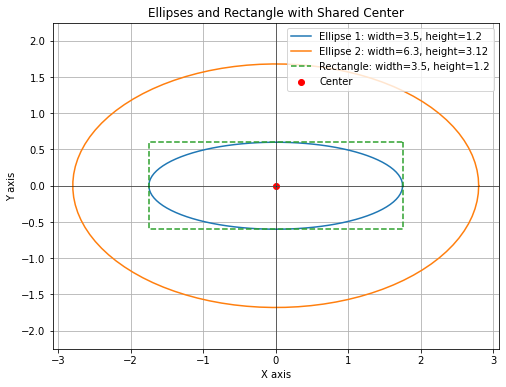

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 定义椭圆和长方形的参数
width1 = 3.5
height1 = 1.2
width2 = width1 * 1.6
height2 = height1 * 2.8

# 定义长方形的四个角的坐标（正确设置长和宽）
rectangle_x = np.array([width1 / 2, width1 / 2, -width1 / 2, -width1 / 2, width1 / 2])
rectangle_y = np.array([height1 / 2, -height1 / 2, -height1 / 2, height1 / 2, height1 / 2])

# 定义椭圆的中心位置
center_x = 0
center_y = 0

# 生成椭圆的点
theta = np.linspace(0, 2 * np.pi, 100)
x1 = center_x + width1 * np.cos(theta) / 2
y1 = center_y + height1 * np.sin(theta) / 2
x2 = center_x + width2 * np.cos(theta) / 2
y2 = center_y + height2 * np.sin(theta) / 2

# 绘制图形
plt.figure(figsize=(8, 6))
plt.plot(x1, y1, label='Ellipse 1: width=3.5, height=1.2')
plt.plot(x2, y2, label='Ellipse 2: width=6.3, height=3.12')
plt.plot(rectangle_x, rectangle_y, label='Rectangle: width=3.5, height=1.2', linestyle='--')
plt.scatter(center_x, center_y, color='red', label='Center')
plt.title('Ellipses and Rectangle with Shared Center')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()



In [ ]:
import numpy as np
np.zeros((30,4))[:,3]
Q = [np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),
        np.diag([2.0,6.0,10.0,0.0,35.0,10.0]),]
len(Q)

30

In [7]:
import pickle
file_dir = r"C:\Users\sym02\Desktop\Research\Extension\codes\decision_change_rear\file_save\1717334193.8617845400"
file_content = open(file_dir,'rb')
content = pickle.load(file_content)

In [27]:
import numpy as np
#变长的轨迹点,轨迹类,x,y,yaw,k
class traj_point:
    def __init__(self, traj_num, total_time, traj):
        # traj is a dict 
        self.traj_num = traj_num
        self.total_time = total_time
        self.traj = traj
        
    def traj_num_func(self):
        return self.traj_num
    
    def total_time_func(self):
        return self.total_time
    
    def get_coord_at_timestamp(self, t):
        pos = self.traj[t]
        x,y = pos
        return x,y
    
    def check_valid(self):
        
        # 如果某一个time是untrack，则对其进行插值
        
        return

        
    

points_num = 20
time_ = 2
time_steps = 20
traj = {}
keys = np.arange(0.0,2,0.1)
xs = np.arange(1.0,21,1)
ys =np.arange(0,2,0.1)
for i in range(time_steps):
    traj[keys[i]] = (xs[i],ys[i])
    


In [25]:
traj_test = traj_point(points_num,time_steps,traj)

In [26]:
traj_test.get_coord_at_timestamp(0.2)

(3.0, 0.2)

In [ ]:
def judge_original(positions,orig_pos):
    # positions 是二维 array
    distances = positions - orig_pos
    np.argmin(distances)
    return